## Data Loading & Cleaning

In [1]:
import json
import pandas as pd
from pathlib import Path

# Define the path to your compiled results file
RESULTS_PATH = Path("/clwork/kexin/tsar_st/data/a.compiled_results")
COMPILED_FILE = RESULTS_PATH / "compiled_results.json"

# Load the JSON data from the file
print(f"Loading data from {COMPILED_FILE}...")
with open(COMPILED_FILE, 'r', encoding='utf-8') as f:
    compiled_data = json.load(f)

# --- Flatten the nested JSON into a list of records ---
all_candidates = []
for text_id, data in compiled_data.items():
    # Loop through each candidate for the current text_id
    for candidate in data.get('candidates', []):
        # Create a new, flat dictionary for this candidate
        flat_record = {
            # Top-level info (repeated for each candidate)
            'text_id': text_id,
            'original': data.get('original'),
            'reference': data.get('reference'),
            'target_cefr': data.get('target_cefr'),

            # --- CORRECTED: Added the source-reference analysis to each row ---
            'src_ref_similarity': data.get('similarity_scores'),
            'cefr_profile_original': data.get('cefr_profile_original'),
            'cefr_profile_reference': data.get('cefr_profile_reference'),
            
            # Information from the candidate itself
            'run_name': candidate.get('run_name'),
            'simplified_text': candidate.get('simplified_text'),
            
            # Unpack all the scores from the candidate dictionary
            **candidate
        }
        all_candidates.append(flat_record)

# Create the final DataFrame
df = pd.DataFrame(all_candidates)

# Set some display options for better viewing
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

print(f"\nSuccessfully created DataFrame with {len(df)} rows and {len(df.columns)} columns.")

# Display the column names to confirm the new additions
print("\n--- DataFrame Columns ---")
print(df.columns)

# Display the first few rows and a summary of the DataFrame
print("--- DataFrame Head ---")
display(df.head())

print("\n--- DataFrame Info ---")
df.info()

Loading data from /clwork/kexin/tsar_st/data/a.compiled_results/compiled_results.json...

Successfully created DataFrame with 1840 rows and 17 columns.

--- DataFrame Columns ---
Index(['text_id', 'original', 'reference', 'target_cefr', 'src_ref_similarity', 'cefr_profile_original',
       'cefr_profile_reference', 'run_name', 'simplified_text', 'predicted_cefr', 'cefr_adj_accuracy',
       'meaningbert_orig', 'bertscore_f1_orig', 'meaningbert_ref', 'bertscore_f1_ref', 'predicted_cefr_confidence',
       'cefr_probas'],
      dtype='object')
--- DataFrame Head ---


,text_id,original,reference,target_cefr,src_ref_similarity,cefr_profile_original,cefr_profile_reference,run_name,simplified_text,predicted_cefr,cefr_adj_accuracy,meaningbert_orig,bertscore_f1_orig,meaningbert_ref,bertscore_f1_ref,predicted_cefr_confidence,cefr_probas
0,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,"{'meaningbert': 0.8731, 'bertscore_f1': 0.9216}","{'best_prediction': {'label': 'B1', 'score': 0...","{'best_prediction': {'label': 'B1', 'score': 0...",gpt4o_with_description_2_shot_20250727-171917,NASA is now trying to find smaller asteroids. ...,A2,1,0.7641,0.9431,0.8410,0.9266,0.9981,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.2e-05...
1,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,"{'meaningbert': 0.8731, 'bertscore_f1': 0.9216}","{'best_prediction': {'label': 'B1', 'score': 0...","{'best_prediction': {'label': 'B1', 'score': 0...",gpt4o_with_description_20250727-160655,Now NASA is working to find smaller asteroids ...,A2,1,0.8279,0.9459,0.8342,0.9280,0.9893,"{'ModernBERT-base-doc_en-Cefr': {'A1': 9e-05, ..."
2,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,"{'meaningbert': 0.8731, 'bertscore_f1': 0.9216}","{'best_prediction': {'label': 'B1', 'score': 0...","{'best_prediction': {'label': 'B1', 'score': 0...",gpt4o_target_250727-151039,NASA is now trying to keep track of smaller as...,A2,1,0.7711,0.9356,0.8201,0.9271,0.9942,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.2e-05...
3,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,"{'meaningbert': 0.8731, 'bertscore_f1': 0.9216}","{'best_prediction': {'label': 'B1', 'score': 0...","{'best_prediction': {'label': 'B1', 'score': 0...",o1_target_250727-151248,NASA is now trying to find and record some sma...,B2,0,0.8478,0.9449,0.8254,0.9252,0.9987,{'ModernBERT-base-doc_en-Cefr': {'A1': 2.3e-05...
4,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,"{'meaningbert': 0.8731, 'bertscore_f1': 0.9216}","{'best_prediction': {'label': 'B1', 'score': 0...","{'best_prediction': {'label': 'B1', 'score': 0...",o1_with_description_20250727-160906,NASA is working to find smaller asteroids that...,A2,1,0.8195,0.9508,0.8286,0.9325,0.9945,"{'ModernBERT-base-doc_en-Cefr': {'A1': 7e-05, ..."



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   text_id                    1840 non-null   object 
 1   original                   1840 non-null   object 
 2   reference                  1840 non-null   object 
 3   target_cefr                1840 non-null   object 
 4   src_ref_similarity         1840 non-null   object 
 5   cefr_profile_original      1840 non-null   object 
 6   cefr_profile_reference     1840 non-null   object 
 7   run_name                   1840 non-null   object 
 8   simplified_text            1840 non-null   object 
 9   predicted_cefr             1840 non-null   object 
 10  cefr_adj_accuracy          1840 non-null   int64  
 11  meaningbert_orig           1840 non-null   float64
 12  bertscore_f1_orig          1840 non-null   float64
 13  meaningbert_ref         

In [2]:
import numpy as np

# Clean names

# --- 1. Filter out 'CoT' runs ---
df = df[~df['run_name'].str.contains('cot')].copy()
print(f"Filtered out 'CoT' runs. DataFrame now has {len(df)} rows.")

# --- 2. Generate Base Columns (clean_name, model, few_shot) ---
# This part is the same as before, ensuring our foundation is correct.
df['clean_name'] = df['run_name'].str.rsplit('_', n=1).str[0]

model_conditions = [
    df['clean_name'].str.contains('gpt4o'), df['clean_name'].str.contains('gpt_5|gpt5'),
    df['clean_name'].str.contains('claude_4|claude4'), df['clean_name'].str.contains('gemma_3|gemma3'),
    df['clean_name'].str.contains('o1'), df['clean_name'].str.contains('o3')
]
model_choices = ['GPT-4o', 'GPT-5', 'Claude 4', 'Gemma 3', 'Opus 1', 'Opus 3']
df['model'] = np.select(model_conditions, model_choices, default='Unknown')

shot_conditions = [df['clean_name'].str.contains('2_shot'), df['clean_name'].str.contains('1_shot')]
shot_choices = [2, 1]
df['few_shot'] = np.select(shot_conditions, shot_choices, default=0)


# --- 3. Create the New, Structured Columns ---

# Create the 'base_prompt' column
# If 'target' is in the name, it's 'Target Only'. Otherwise, it's 'With Description'.
df['base_prompt'] = np.where(df['clean_name'].str.contains('target'),
                             'Target Only', 'With Description')

# Create the 'sampling_strategy' column
sampling_conditions = [
    df['clean_name'].str.contains('contrastive'),
    df['clean_name'].str.contains('confidence'),
    df['few_shot'] > 0  # If it's few-shot and not the above, it's 'Random'
]
sampling_choices = ['Contrastive', 'Confidence-Based', 'Random']
# The default 'N/A' applies to all zero-shot runs
df['sampling_strategy'] = np.select(sampling_conditions, sampling_choices, default='N/A')


# --- 4. Display the Results ---
print("\n--- New, Reorganized Columns ---")
# Define columns to show for verification
display_cols = [
    'run_name', 'model', 'base_prompt', 'few_shot', 'sampling_strategy'
]
display(df[display_cols].sample(15, random_state=1))

print("\n--- Summary of New Categories ---")
# Use crosstab for a nice overview of the experimental design
display(pd.crosstab(
    index=[df['base_prompt'], df['sampling_strategy']],
    columns=df['few_shot'],
    margins=True
))

Filtered out 'CoT' runs. DataFrame now has 1800 rows.

--- New, Reorganized Columns ---


,run_name,model,base_prompt,few_shot,sampling_strategy
1495,o3_contrastive_20250807-094515,Opus 3,With Description,0,Contrastive
522,claude_4_target_20250806-222640,Claude 4,Target Only,0,N/A
626,gpt_5_with_description_20250813-111658,GPT-5,With Description,0,N/A
1352,claude_4_with_description_1_shot_20250806-230728,Claude 4,With Description,1,Random
1015,o1_target_250727-151248,Opus 1,Target Only,0,N/A
194,o1_with_description_1_shot_20250727-164428,Opus 1,With Description,1,Random
1754,o3_target_250727-151801,Opus 3,Target Only,0,N/A
1072,gemma_3_target_20250807-032335,Gemma 3,Target Only,0,N/A
1439,o1_1_shot_confidence_20250816-000529,Opus 1,With Description,1,Confidence-Based
901,gpt_5_target_20250813-105845,GPT-5,Target Only,0,N/A



--- Summary of New Categories ---


few_shot                              0    1    2   All
base_prompt      sampling_strategy                     
Target Only      N/A                240    0    0   240
With Description Confidence-Based     0  200  160   360
                 Contrastive        240  200   40   480
                 N/A                240    0    0   240
                 Random               0  240  240   480
All                                 720  640  440  1800

In [3]:
# Keeping the data format consistent between src-ref and src/ref-candidates

# --- 1. Flatten the source-reference similarity scores ---
# This turns the dictionary in 'src_ref_similarity' into two new columns
similarity_scores = df['src_ref_similarity'].apply(pd.Series)
df['src_ref_meaningbert'] = similarity_scores['meaningbert']
df['src_ref_bertscore_f1'] = similarity_scores['bertscore_f1']


# --- 2. Flatten the CEFR profile for the ORIGINAL text ---
# Extract the best prediction (label and score)
orig_best_pred = df['cefr_profile_original'].str.get('best_prediction').apply(pd.Series)
df['orig_predicted_cefr'] = orig_best_pred['label']
df['orig_predicted_cefr_confidence'] = orig_best_pred['score']

# Extract just the probability distributions to match the 'cefr_probas' format
df['orig_cefr_probas'] = df['cefr_profile_original'].str.get('all_model_probas')


# --- 3. Flatten the CEFR profile for the REFERENCE text ---
# Extract the best prediction (label and score)
ref_best_pred = df['cefr_profile_reference'].str.get('best_prediction').apply(pd.Series)
df['ref_predicted_cefr'] = ref_best_pred['label']
df['ref_predicted_cefr_confidence'] = ref_best_pred['score']

# Extract just the probability distributions
df['ref_cefr_probas'] = df['cefr_profile_reference'].str.get('all_model_probas')


# --- 4. Drop the old, nested columns to clean up ---
df = df.drop(columns=[
    'src_ref_similarity',
    'cefr_profile_original',
    'cefr_profile_reference'
])

# # --- 5. Display the results to verify ---
# print("✅ DataFrame has been cleaned and normalized.")
# print("\nHere are the new columns:\n")

# # Show a sample of the newly created columns
# newly_created_cols = [
#     'src_ref_meaningbert', 'src_ref_bertscore_f1',
#     'orig_predicted_cefr', 'orig_predicted_cefr_confidence',
#     'ref_predicted_cefr', 'ref_predicted_cefr_confidence',
# ]
# display(df[newly_created_cols].head())

In [4]:
df.head()

,text_id,original,reference,target_cefr,run_name,simplified_text,predicted_cefr,cefr_adj_accuracy,meaningbert_orig,bertscore_f1_orig,meaningbert_ref,bertscore_f1_ref,predicted_cefr_confidence,cefr_probas,clean_name,model,few_shot,base_prompt,sampling_strategy,src_ref_meaningbert,src_ref_bertscore_f1,orig_predicted_cefr,orig_predicted_cefr_confidence,orig_cefr_probas,ref_predicted_cefr,ref_predicted_cefr_confidence,ref_cefr_probas
0,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,gpt4o_with_description_2_shot_20250727-171917,NASA is now trying to find smaller asteroids. ...,A2,1,0.7641,0.9431,0.8410,0.9266,0.9981,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.2e-05...,gpt4o_with_description_2_shot,GPT-4o,2,With Description,Random,0.8731,0.9216,B1,0.99858,{'ModernBERT-base-doc_en-Cefr': {'A1': 5.3e-05...,B1,0.991898,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.3e-05...
1,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,gpt4o_with_description_20250727-160655,Now NASA is working to find smaller asteroids ...,A2,1,0.8279,0.9459,0.8342,0.9280,0.9893,"{'ModernBERT-base-doc_en-Cefr': {'A1': 9e-05, ...",gpt4o_with_description,GPT-4o,0,With Description,N/A,0.8731,0.9216,B1,0.99858,{'ModernBERT-base-doc_en-Cefr': {'A1': 5.3e-05...,B1,0.991898,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.3e-05...
2,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,gpt4o_target_250727-151039,NASA is now trying to keep track of smaller as...,A2,1,0.7711,0.9356,0.8201,0.9271,0.9942,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.2e-05...,gpt4o_target,GPT-4o,0,Target Only,N/A,0.8731,0.9216,B1,0.99858,{'ModernBERT-base-doc_en-Cefr': {'A1': 5.3e-05...,B1,0.991898,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.3e-05...
3,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,o1_target_250727-151248,NASA is now trying to find and record some sma...,B2,0,0.8478,0.9449,0.8254,0.9252,0.9987,{'ModernBERT-base-doc_en-Cefr': {'A1': 2.3e-05...,o1_target,Opus 1,0,Target Only,N/A,0.8731,0.9216,B1,0.99858,{'ModernBERT-base-doc_en-Cefr': {'A1': 5.3e-05...,B1,0.991898,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.3e-05...
4,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,A2,o1_with_description_20250727-160906,NASA is working to find smaller asteroids that...,A2,1,0.8195,0.9508,0.8286,0.9325,0.9945,"{'ModernBERT-base-doc_en-Cefr': {'A1': 7e-05, ...",o1_with_description,Opus 1,0,With Description,N/A,0.8731,0.9216,B1,0.99858,{'ModernBERT-base-doc_en-Cefr': {'A1': 5.3e-05...,B1,0.991898,{'ModernBERT-base-doc_en-Cefr': {'A1': 3.3e-05...


## Source EDA

In [5]:
from scipy.stats import entropy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_disagreement(probas_dict):
    """
    Calculates the entropy of the mean probability distribution
    across the three CEFR classifiers. High entropy = high disagreement.
    """
    if not isinstance(probas_dict, dict) or not probas_dict:
        return None
    
    # Create a DataFrame from the nested dictionary, calculate the mean
    # probability for each CEFR level across the models.
    mean_probas = pd.DataFrame(probas_dict).mean(axis=1)
    
    # Return the entropy of this averaged distribution
    return entropy(mean_probas)

# --- Apply the function to create the new disagreement column ---
df['orig_cefr_disagreement'] = df['orig_cefr_probas'].apply(calculate_disagreement)

In [6]:
# Select all columns related to the original texts
originals_cols = [
    'original',
    'orig_predicted_cefr',
    'orig_predicted_cefr_confidence',
    'orig_cefr_probas',
    'orig_cefr_disagreement' # The disagreement score we just calculated
]

# Create a new DataFrame by dropping duplicates based on the text content
df_originals = df[originals_cols].drop_duplicates(subset=['original']).reset_index(drop=True)

print(f"The de-duplicated DataFrame has {len(df_originals)} rows (one per unique original text).")

The de-duplicated DataFrame has 20 rows (one per unique original text).



--- CORRECTED CEFR Level Distribution of Original Texts ---
orig_predicted_cefr
A2     3
B1     4
B2    11
C1     2
Name: count, dtype: int64


/tmp/ipykernel_1332099/4202307631.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_1332099/4202307631.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


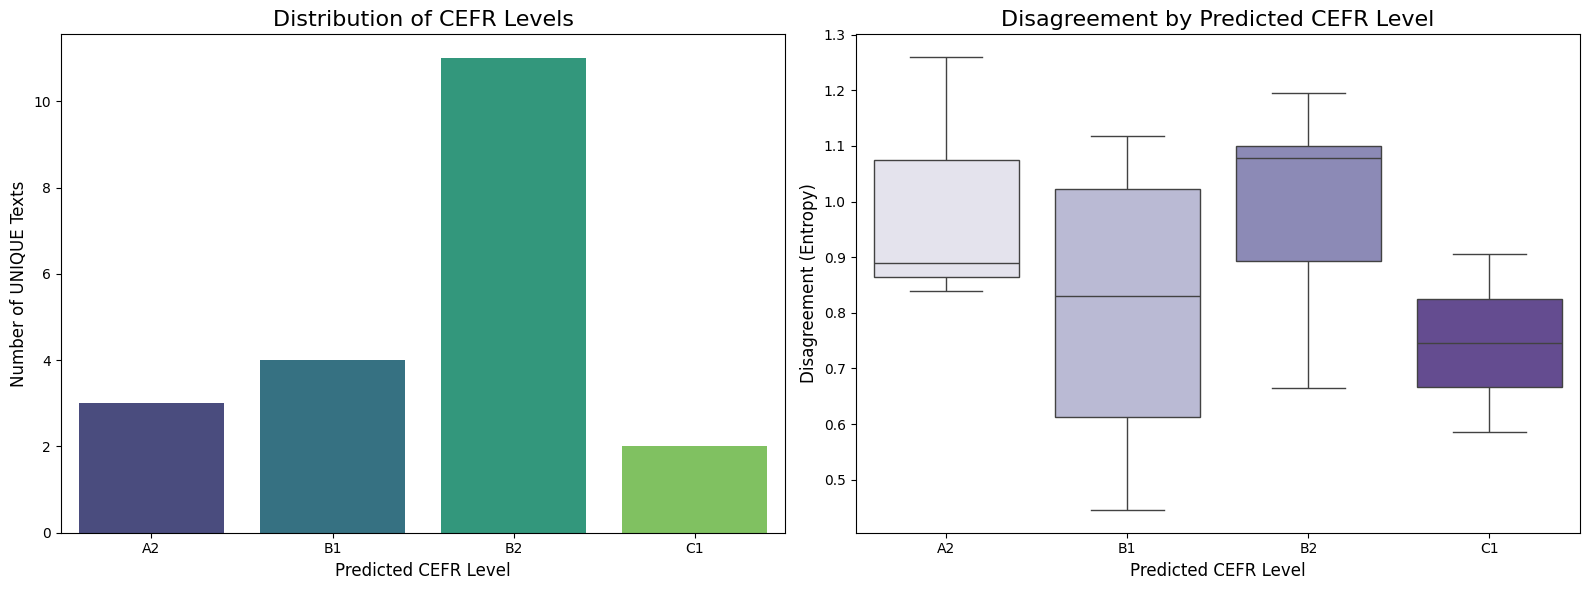

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Re-running the CEFR Distribution Analysis ---
cefr_counts_correct = df_originals['orig_predicted_cefr'].value_counts().sort_index()

print("\n--- CORRECTED CEFR Level Distribution of Original Texts ---")
print(cefr_counts_correct)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar chart with correct counts
sns.countplot(
    x='orig_predicted_cefr',
    data=df_originals,
    order=sorted(df_originals['orig_predicted_cefr'].unique()),
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Distribution of CEFR Levels', fontsize=16)
axes[0].set_xlabel('Predicted CEFR Level', fontsize=12)
axes[0].set_ylabel('Number of UNIQUE Texts', fontsize=12) # Note the updated label

# --- Disagreement Analysis ---
# Plot 2: Box plot of disagreement (shapes should be very similar)
sns.boxplot(
    x='orig_predicted_cefr',
    y='orig_cefr_disagreement',
    data=df_originals,
    order=sorted(df_originals['orig_predicted_cefr'].unique()),
    ax=axes[1],
    palette='Purples'
)
axes[1].set_title('Disagreement by Predicted CEFR Level', fontsize=16)
axes[1].set_xlabel('Predicted CEFR Level', fontsize=12)
axes[1].set_ylabel('Disagreement (Entropy)', fontsize=12)

plt.tight_layout()
plt.show()

## References EDA

In [8]:
# Select all columns relevant to the reference texts and their originals
ref_cols = [
    'text_id', 'original', 'reference', 'target_cefr',
    'orig_predicted_cefr', 'ref_predicted_cefr',
    'ref_predicted_cefr_confidence', 'ref_cefr_probas'
]

# Create a new DataFrame by dropping duplicates on 'text_id'
df_references = df[ref_cols].drop_duplicates(subset=['text_id']).reset_index(drop=True)

print(f"De-duplicated DataFrame for references has {len(df_references)} rows (one per unique reference).")

De-duplicated DataFrame for references has 40 rows (one per unique reference).


/tmp/ipykernel_1332099/104344207.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_1332099/104344207.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


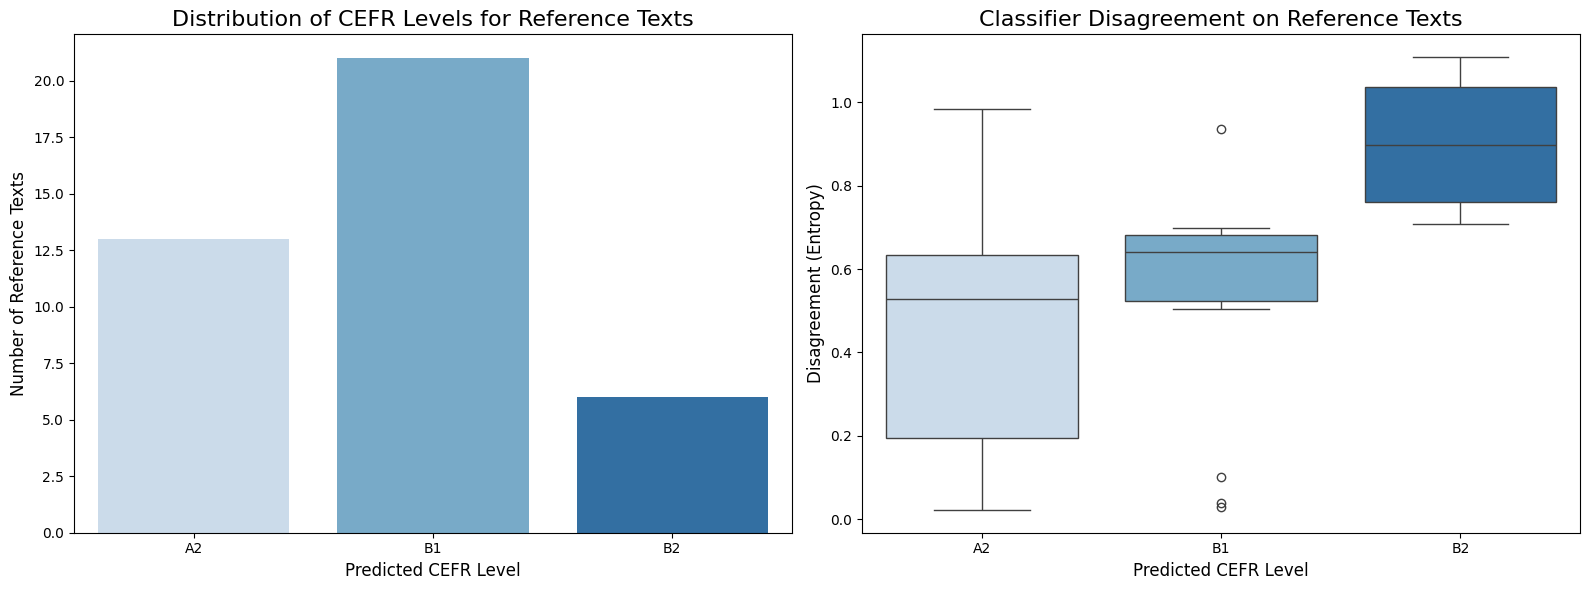

In [9]:
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt

# --- Calculate the disagreement score for references ---
def calculate_disagreement(probas_dict):
    if not isinstance(probas_dict, dict) or not probas_dict:
        return None
    mean_probas = pd.DataFrame(probas_dict).mean(axis=1)
    return entropy(mean_probas)

df_references['ref_cefr_disagreement'] = df_references['ref_cefr_probas'].apply(calculate_disagreement)

# --- Visualize the characteristics of the reference texts ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar chart of CEFR levels in references
sns.countplot(
    x='ref_predicted_cefr',
    data=df_references,
    order=sorted(df_references['ref_predicted_cefr'].dropna().unique()),
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('Distribution of CEFR Levels for Reference Texts', fontsize=16)
axes[0].set_xlabel('Predicted CEFR Level', fontsize=12)
axes[0].set_ylabel('Number of Reference Texts', fontsize=12)

# Plot 2: Box plot of disagreement on references
sns.boxplot(
    x='ref_predicted_cefr',
    y='ref_cefr_disagreement',
    data=df_references,
    order=sorted(df_references['ref_predicted_cefr'].dropna().unique()),
    ax=axes[1],
    palette='Blues'
)
axes[1].set_title('Classifier Disagreement on Reference Texts', fontsize=16)
axes[1].set_xlabel('Predicted CEFR Level', fontsize=12)
axes[1].set_ylabel('Disagreement (Entropy)', fontsize=12)

plt.tight_layout()
plt.show()

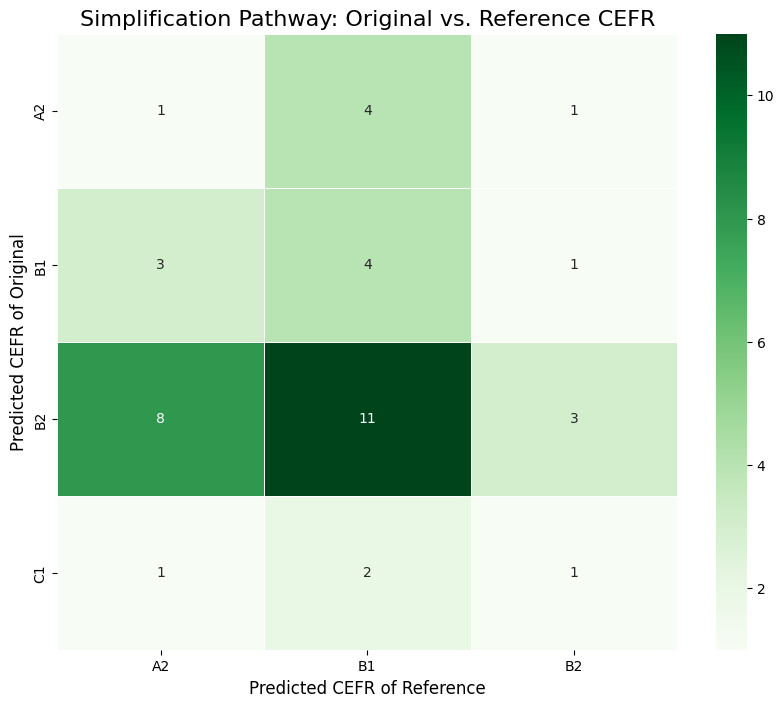

In [10]:
# --- Create a crosstab to count the simplification "pathways" ---
simplification_pathway = pd.crosstab(
    df_references['orig_predicted_cefr'],
    df_references['ref_predicted_cefr']
)

# --- Plot the heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    simplification_pathway,
    annot=True,      # Show the counts in each cell
    fmt='d',         # Format as integers
    cmap='Greens',
    linewidths=.5
)

plt.title('Simplification Pathway: Original vs. Reference CEFR', fontsize=16)
plt.xlabel('Predicted CEFR of Reference', fontsize=12)
plt.ylabel('Predicted CEFR of Original', fontsize=12)
plt.show()

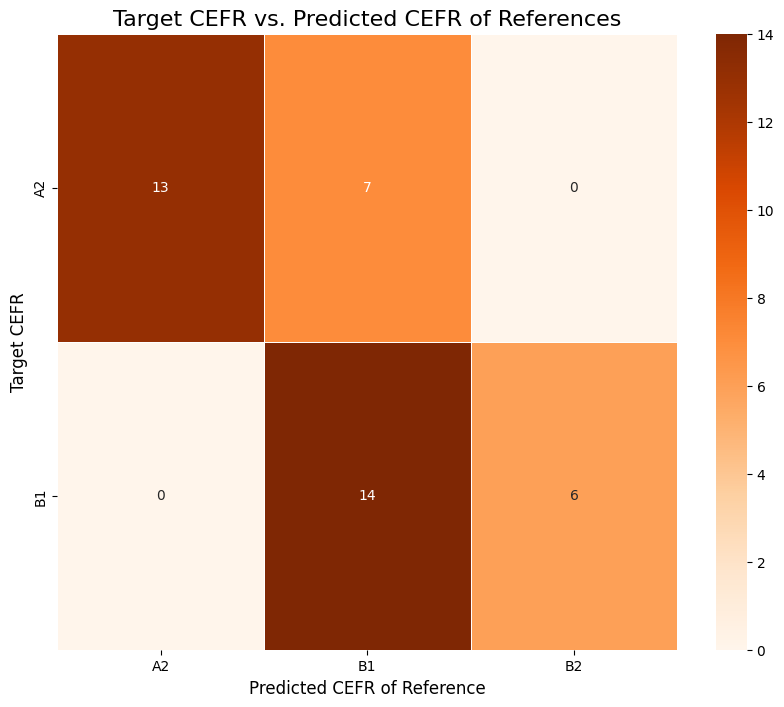


Overall Agreement Rate: 67.50%
Out of 40 human references, 27 were classified at their intended target level.


In [11]:
# --- 1. Create a crosstab to compare the target vs. predicted CEFR ---
# We'll use the df_references DataFrame which is already de-duplicated.
target_vs_predicted = pd.crosstab(
    df_references['target_cefr'],
    df_references['ref_predicted_cefr'],
    dropna=True # Exclude any rows where one of the values is missing
)

# --- 2. Plot the heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    target_vs_predicted,
    annot=True,
    fmt='d',
    cmap='Oranges',
    linewidths=.5
)
plt.title('Target CEFR vs. Predicted CEFR of References', fontsize=16)
plt.xlabel('Predicted CEFR of Reference', fontsize=12)
plt.ylabel('Target CEFR', fontsize=12)
plt.show()

# --- 3. Calculate Overall Agreement Rate ---
# The main diagonal of the matrix represents correct matches.
correct_matches = np.diag(target_vs_predicted).sum()
total_references = target_vs_predicted.sum().sum()
agreement_rate = (correct_matches / total_references) * 100

print(f"\nOverall Agreement Rate: {agreement_rate:.2f}%")
print(f"Out of {total_references} human references, {correct_matches} were classified at their intended target level.")

/tmp/ipykernel_1332099/1113629304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_1332099/1113629304.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mismatch (False)', 'Match (True)'])


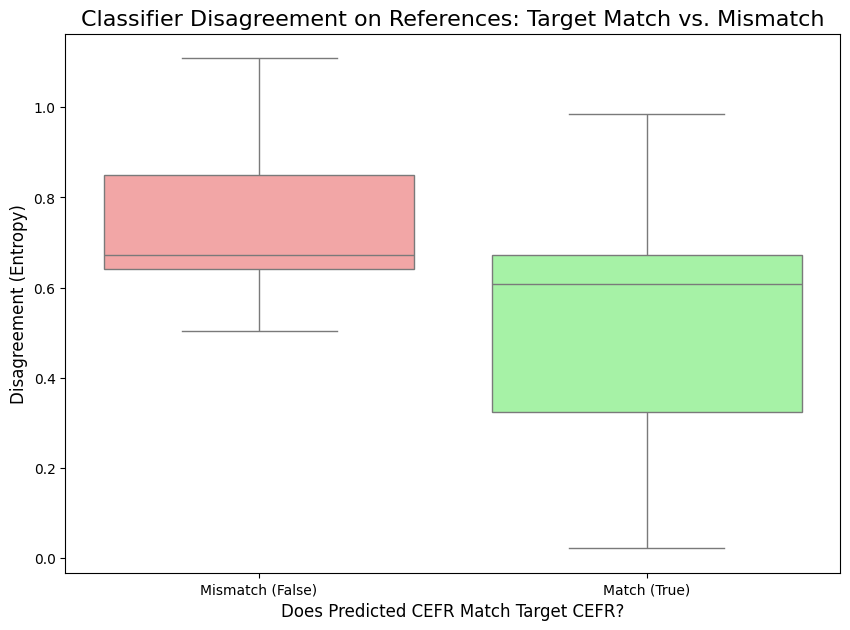

                 count      mean       std       min       25%       50%       75%       max
is_target_match                                                                             
False             13.0  0.751021  0.185786  0.503708  0.641150  0.672462  0.849254  1.108759
True              27.0  0.501282  0.273233  0.021637  0.324388  0.607107  0.672726  0.984686


In [12]:
# --- 1. Create a column to identify target matches ---
# We'll use the df_references DataFrame from the previous step
df_references['is_target_match'] = (
    df_references['target_cefr'] == df_references['ref_predicted_cefr']
)

# --- 2. Visualize the disagreement for matches vs. mismatches ---
plt.figure(figsize=(10, 7))
ax = sns.boxplot(
    x='is_target_match',
    y='ref_cefr_disagreement',
    data=df_references,
    palette=['#FF9999', '#99FF99'] # Red for False, Green for True
)
ax.set_title('Classifier Disagreement on References: Target Match vs. Mismatch', fontsize=16)
ax.set_xlabel('Does Predicted CEFR Match Target CEFR?', fontsize=12)
ax.set_ylabel('Disagreement (Entropy)', fontsize=12)
ax.set_xticklabels(['Mismatch (False)', 'Match (True)'])
plt.show()

# --- 3. Optional: Print the mean disagreement for each group ---
print(df_references.groupby('is_target_match')['ref_cefr_disagreement'].describe())

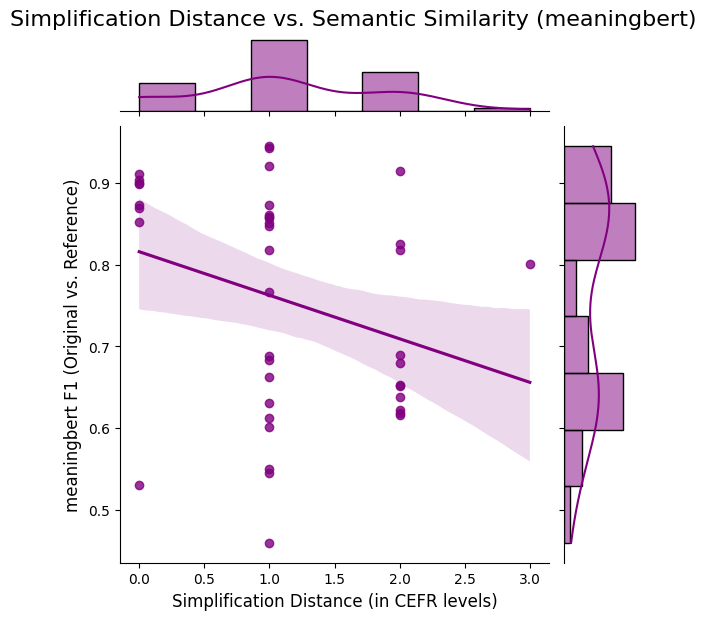

--- Final df_src_ref DataFrame ---
DataFrame has 40 rows.


,text_id,original,reference,orig_predicted_cefr,ref_predicted_cefr,src_ref_meaningbert,src_ref_bertscore_f1,orig_cefr_numeric,ref_cefr_numeric,simplification_distance
0,01-a2,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,B1,B1,0.8731,0.9216,3,3,0
46,01-b1,Now NASA is working towards logging some of th...,Asteroids are rocks that fly through space. NA...,B1,B2,0.8579,0.9197,3,4,1
92,02-a2,"Earthquakes damage all structures, including b...",An earthquake means when the ground shakes a l...,B2,A2,0.6794,0.9095,4,2,2
138,02-b1,"Earthquakes damage all structures, including b...","Earthquakes damage all kinds of buildings, inc...",B2,B1,0.8605,0.9474,4,3,1
184,03-a2,"The Hunger Games are an annual event, which th...",The 'Hunger Games' happen every year. Why? To ...,A2,A2,0.5302,0.8981,2,2,0


In [13]:
# --- 1. Create the complete and correct source-reference DataFrame ---
# We select all necessary columns from the main 'df' from the start.
src_ref_cols = [
    'text_id',
    'original',                          # <-- Now included
    'reference',                         # <-- Now included
    'orig_predicted_cefr',
    'ref_predicted_cefr',
    'src_ref_meaningbert',
    'src_ref_bertscore_f1'
]
df_src_ref = df[src_ref_cols].drop_duplicates(subset=['text_id']).copy()


# --- 2. Map CEFR levels to numerical values ---
cefr_to_numeric = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}
df_src_ref['orig_cefr_numeric'] = df_src_ref['orig_predicted_cefr'].map(cefr_to_numeric)
df_src_ref['ref_cefr_numeric'] = df_src_ref['ref_predicted_cefr'].map(cefr_to_numeric)


# --- 3. Calculate Simplification Distance ---
df_src_ref['simplification_distance'] = (df_src_ref['orig_cefr_numeric'] - df_src_ref['ref_cefr_numeric']).abs()


# --- 4. Visualize the relationship ---
# This plot will now run correctly on the self-contained df_src_ref
g = sns.jointplot(
    data=df_src_ref,
    x='simplification_distance',
    y='src_ref_meaningbert',
    kind='reg',
    joint_kws={'color': 'purple'},
    marginal_kws={'color': 'purple', 'kde': True}
)
g.fig.suptitle('Simplification Distance vs. Semantic Similarity (meaningbert)', y=1.02, fontsize=16)
g.set_axis_labels('Simplification Distance (in CEFR levels)', 'meaningbert F1 (Original vs. Reference)', fontsize=12)

plt.show()

# --- 5. Verify the final DataFrame ---
print("--- Final df_src_ref DataFrame ---")
print(f"DataFrame has {len(df_src_ref)} rows.")
display(df_src_ref.head())

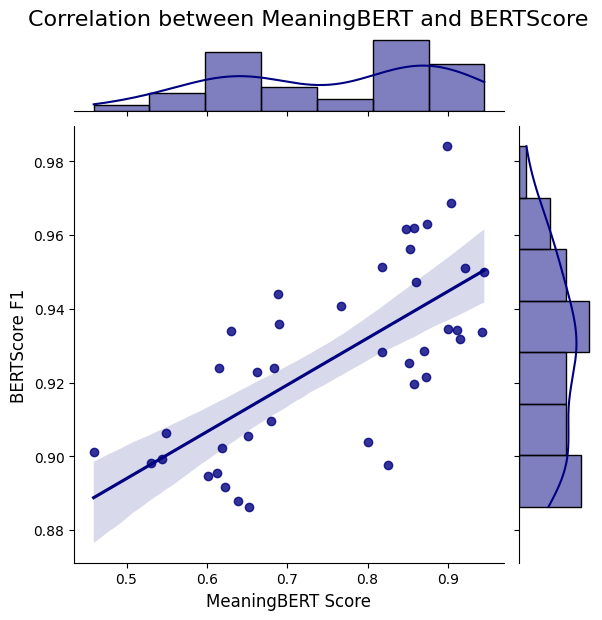

Pearson Correlation Coefficient: 0.6936


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Visualize the correlation between the two similarity scores ---
g = sns.jointplot(
    data=df_src_ref,
    x='src_ref_meaningbert',
    y='src_ref_bertscore_f1',
    kind='reg', # Add a regression line to see the trend
    joint_kws={'color': 'navy'},
    marginal_kws={'color': 'navy', 'kde': True}
)
g.fig.suptitle('Correlation between MeaningBERT and BERTScore', y=1.02, fontsize=16)
g.set_axis_labels('MeaningBERT Score', 'BERTScore F1', fontsize=12)
plt.show()

# --- Calculate the Pearson correlation coefficient ---
correlation = df_src_ref['src_ref_meaningbert'].corr(df_src_ref['src_ref_bertscore_f1'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

In [15]:
# --- Calculate a 'disagreement_score' ---
# To make the scores comparable, we'll rank them and compare the ranks.
df_src_ref['m_bert_rank'] = df_src_ref['src_ref_meaningbert'].rank(pct=True) # Rank as a percentile
df_src_ref['b_score_rank'] = df_src_ref['src_ref_bertscore_f1'].rank(pct=True)
df_src_ref['score_disagreement'] = (df_src_ref['m_bert_rank'] - df_src_ref['b_score_rank']).abs()

# --- Find the 3 instances where MeaningBERT was ranked much higher ---
m_bert_favored = df_src_ref.nlargest(3, 'score_disagreement')

print("--- 🧐 Examples where MeaningBERT >> BERTScore ---")
for index, row in m_bert_favored.iterrows():
    print(f"\nText ID: {row['text_id']} | M-BERT: {row['src_ref_meaningbert']:.3f} | B-Score: {row['src_ref_bertscore_f1']:.3f}")
    print(f"  Original: {row['original'][:150]}...")
    print(f"  Reference: {row['reference'][:150]}...")

# --- Find the 3 instances where BERTScore was ranked much higher ---
b_score_favored = df_src_ref.nsmallest(3, 'score_disagreement')

print("\n\n--- ✨ Examples where BERTScore >> MeaningBERT ---")
for index, row in b_score_favored.iterrows():
    print(f"\nText ID: {row['text_id']} | M-BERT: {row['src_ref_meaningbert']:.3f} | B-Score: {row['src_ref_bertscore_f1']:.3f}")
    print(f"  Original: {row['original'][:150]}...")
    print(f"  Reference: {row['reference'][:150]}...")

--- 🧐 Examples where MeaningBERT >> BERTScore ---

Text ID: 05-a2 | M-BERT: 0.825 | B-Score: 0.898
  Original: Potentially Hazardous Asteroids' are rocks close enough to pass within 7.5 million kilometres of Earth's orbit. NASA has created a map of 1,400 PHAs, ...
  Reference: Some rocks in space may be dangerous to Earth. If they fly near to Earth (less than 7.5 million kilometres away), they are 'Potentially Hazardous Aste...

Text ID: 01-a2 | M-BERT: 0.873 | B-Score: 0.922
  Original: Now NASA is working towards logging some of the smaller asteroids, those measuring 140 metres wide or more. Of the 25,000 estimated asteroids of this ...
  Reference: Asteroids are small rocks in space. NASA is collecting information about middle-sized asteroids (bigger than 140 metres wide). They think there are 25...

Text ID: 04-a2 | M-BERT: 0.630 | B-Score: 0.934
  Original: Small animals like birds, squirrels, mice and insects are a common sight in many cities and towns. But in recent years, the w

## Classifiers

In [16]:
df.columns

Index(['text_id', 'original', 'reference', 'target_cefr', 'run_name', 'simplified_text', 'predicted_cefr',
       'cefr_adj_accuracy', 'meaningbert_orig', 'bertscore_f1_orig', 'meaningbert_ref', 'bertscore_f1_ref',
       'predicted_cefr_confidence', 'cefr_probas', 'clean_name', 'model', 'few_shot', 'base_prompt',
       'sampling_strategy', 'src_ref_meaningbert', 'src_ref_bertscore_f1', 'orig_predicted_cefr',
       'orig_predicted_cefr_confidence', 'orig_cefr_probas', 'ref_predicted_cefr', 'ref_predicted_cefr_confidence',
       'ref_cefr_probas', 'orig_cefr_disagreement'],
      dtype='object')

In [17]:
import pandas as pd

# --- 1. Extract ORIGINALS with text_id ---
# This part remains the same.
originals_df = df[['text_id', 'original', 'orig_cefr_probas']].copy()
originals_df = originals_df.rename(columns={
    'original': 'text',
    'orig_cefr_probas': 'cefr_probas'
})
originals_df['source_type'] = 'Original'
originals_df = originals_df.drop_duplicates(subset=['text_id'])


# --- 2. Extract REFERENCES with text_id ---
# This part also remains the same.
references_df = df[['text_id', 'reference', 'ref_cefr_probas']].copy()
references_df = references_df.rename(columns={
    'reference': 'text',
    'ref_cefr_probas': 'cefr_probas'
})
references_df['source_type'] = 'Reference'
references_df = references_df.drop_duplicates(subset=['text_id'])


# --- 3. Extract CANDIDATES with full configuration details ---
# This is the key change. We now keep the columns that identify the system.
candidate_cols = [
    'text_id',
    'simplified_text',
    'cefr_probas',
    'model',
    'base_prompt',
    'sampling_strategy',
    'few_shot'
]
candidates_df = df[candidate_cols].copy()
candidates_df = candidates_df.rename(columns={'simplified_text': 'text'})
candidates_df['source_type'] = 'Candidate'


# --- 4. Combine everything into the final DataFrame ---
df_classifiers = pd.concat(
    [originals_df, references_df, candidates_df],
    ignore_index=True
).dropna(subset=['text']).reset_index(drop=True)

print("✅ Rebuilt df_classifiers with full candidate details.")


# # --- 5. Save the DataFrame to a JSONL file ---
# output_path = 'data_for_lca.jsonl'
# df_classifiers.to_json(output_path, orient='records', lines=True)

# print(f"✅ Successfully saved {len(df_classifiers)} rows to '{output_path}'")


# # --- 6. Verify the output ---
# print("\n--- Final DataFrame Sample ---")
# # Display a sample showing the different source types
# display(df_classifiers.sample(10, random_state=42))

✅ Rebuilt df_classifiers with full candidate details.


In [18]:
import pandas as pd

# Define the paths to your result files
sca_results_path = '/clwork/kexin/tsar_st/data/tsar_st_sca_results.csv'
lca_results_path = '/clwork/kexin/tsar_st/data/tsar_st_lca_results.csv'

# Load the CSVs
sca_df = pd.read_csv(sca_results_path)
lca_df = pd.read_csv(lca_results_path)

print("✅ Successfully loaded LCA and SCA result files.")
display(lca_df.head(2))
display(sca_df.head(2))

✅ Successfully loaded LCA and SCA result files.


,text_id,source_type,model,base_prompt,sampling_strategy,few_shot,Filepath,wordtypes,wordtokens,swordtypes,swordtokens,lextypes,lextokens,slextypes,slextokens,verbtypes,verbtokens,sverbtypes,sverbtokens,adjtypes,adjtokens,advtypes,advtokens,nountypes,nountokens,LD,LS1,LS2,VS1,VS2,CVS1,NDW,NDW-50,NDW-ER50,NDW-ES50,TTR,MSTTR,CTTR,RTTR,LogTTR,Uber,LV,VV1,SVV1,CVV1,VV2,NV,AdjV,AdvV,ModV
0,01-a2,Original,NaN,NaN,NaN,NaN,cli_text,54,72,10,15,27,33,10,15,11,12,4,5,5,5,1,1,11,15,0.4583,0.4545,0.1852,0.3333,1.3333,0.8165,54,38,40.0,38.9,0.75,0.76,4.5,6.364,0.9327,27.611,0.8182,0.9167,10.0833,2.2454,0.3333,0.7333,0.1515,0.0303,0.1818
1,01-b1,Original,NaN,NaN,NaN,NaN,cli_text,54,72,10,15,27,33,10,15,11,12,4,5,5,5,1,1,11,15,0.4583,0.4545,0.1852,0.3333,1.3333,0.8165,54,38,40.7,39.1,0.75,0.76,4.5,6.364,0.9327,27.611,0.8182,0.9167,10.0833,2.2454,0.3333,0.7333,0.1515,0.0303,0.1818


,text_id,source_type,model,base_prompt,sampling_strategy,few_shot,Filepath,W,S,VP,C,T,DC,CT,CP,CN,MLS,MLT,MLC,C/S,VP/T,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C
0,01-a2,Original,NaN,NaN,NaN,NaN,cli_text,72,3,9,6,3,3,1,0,10,24.0,24.0,12.0,2.0,3.0,2.0,0.5,1.0,1.0,0.3333,0.0,0.0,3.3333,1.6667
1,01-b1,Original,NaN,NaN,NaN,NaN,cli_text,72,3,9,6,3,3,1,0,10,24.0,24.0,12.0,2.0,3.0,2.0,0.5,1.0,1.0,0.3333,0.0,0.0,3.3333,1.6667


In [19]:
import pandas as pd

# (Assuming lca_df and sca_df are already loaded)

# --- 1. Add Prefixes to Feature Columns ---

# Define the columns that uniquely identify each text record
identifier_cols = [
    'text_id',
    'source_type',
    'model',
    'base_prompt',
    'sampling_strategy',
    'few_shot'
]

# Find the actual feature columns (excluding identifiers and metadata)
lca_feature_cols = [col for col in lca_df.columns if col not in identifier_cols and col != 'Filepath']
sca_feature_cols = [col for col in sca_df.columns if col not in identifier_cols and col != 'Filepath']

# Create dictionaries for renaming, e.g., {'W': 'sca_W', 'S': 'sca_S'}
lca_rename_dict = {col: f'lca_{col}' for col in lca_feature_cols}
sca_rename_dict = {col: f'sca_{col}' for col in sca_feature_cols}

# Apply the renaming
lca_df = lca_df.rename(columns=lca_rename_dict)
sca_df = sca_df.rename(columns=sca_rename_dict)

print("✅ Added 'lca_' and 'sca_' prefixes to feature columns.")


# --- 2. Merge the two feature DataFrames together ---
# This part of your code now works with the prefixed columns
df_features = pd.merge(
    lca_df, # Use the full, renamed DataFrame
    sca_df, # Use the full, renamed DataFrame
    on=identifier_cols,
    how='inner'
)

# --- 3. Merge the combined features back into our main DataFrame ---
print(f"Shape of df_classifiers before merge: {df_classifiers.shape}")

df_classifiers = pd.merge(
    df_classifiers,
    df_features,
    on=identifier_cols,
    how='left'
)

print(f"Shape of df_classifiers after merge:  {df_classifiers.shape}")

# --- 4. Verify the new column names ---
print("\n--- A few of the new, prefixed column names ---")
print([col for col in df_classifiers.columns if 'lca_' in col or 'sca_' in col][:5])

✅ Added 'lca_' and 'sca_' prefixes to feature columns.
Shape of df_classifiers before merge: (1880, 8)
Shape of df_classifiers after merge:  (1880, 76)

--- A few of the new, prefixed column names ---
['lca_wordtypes', 'lca_wordtokens', 'lca_swordtypes', 'lca_swordtokens', 'lca_lextypes']


In [20]:
df_classifiers.columns

Index(['text_id', 'text', 'cefr_probas', 'source_type', 'model', 'base_prompt', 'sampling_strategy', 'few_shot',
       'Filepath_x', 'lca_wordtypes', 'lca_wordtokens', 'lca_swordtypes', 'lca_swordtokens', 'lca_lextypes',
       'lca_lextokens', 'lca_slextypes', 'lca_slextokens', 'lca_verbtypes', 'lca_verbtokens', 'lca_sverbtypes',
       'lca_sverbtokens', 'lca_adjtypes', 'lca_adjtokens', 'lca_advtypes', 'lca_advtokens', 'lca_nountypes',
       'lca_nountokens', 'lca_LD', 'lca_LS1', 'lca_LS2', 'lca_VS1', 'lca_VS2', 'lca_CVS1', 'lca_NDW', 'lca_NDW-50',
       'lca_NDW-ER50', 'lca_NDW-ES50', 'lca_TTR', 'lca_MSTTR', 'lca_CTTR', 'lca_RTTR', 'lca_LogTTR', 'lca_Uber',
       'lca_LV', 'lca_VV1', 'lca_SVV1', 'lca_CVV1', 'lca_VV2', 'lca_NV', 'lca_AdjV', 'lca_AdvV', 'lca_ModV',
       'Filepath_y', 'sca_W', 'sca_S', 'sca_VP', 'sca_C', 'sca_T', 'sca_DC', 'sca_CT', 'sca_CP', 'sca_CN', 'sca_MLS',
       'sca_MLT', 'sca_MLC', 'sca_C/S', 'sca_VP/T', 'sca_C/T', 'sca_DC/C', 'sca_DC/T', 'sca_T/S', 'sc

In [21]:
import pandas as pd

# --- 1. Define a helper function to get a model's top prediction and probability ---
def get_model_prediction_and_prob(probas_dict, model_name):
    """
    For a specific model, finds the CEFR label with the highest
    probability and returns both the label and that probability.
    """
    if isinstance(probas_dict, dict) and model_name in probas_dict:
        model_probas = probas_dict[model_name]
        if model_probas:
            top_label = max(model_probas, key=model_probas.get)
            top_prob = model_probas[top_label]
            return top_label, top_prob
    return None, None

# --- 2. Get the model names and create columns for each ---
# Get the model names dynamically from the first valid row
sample_probas = df_classifiers['cefr_probas'].dropna().iloc[0]
model_names = list(sample_probas.keys())

print("Extracting predictions for each model...")
for model_name in model_names:
    # Create short, descriptive names, e.g., 'doc_en_pred' and 'doc_en_conf'
    short_name = model_name.split('-')[2]
    pred_col = f'{short_name}_pred'
    conf_col = f'{short_name}_conf'
    
    # Apply the function and unpack the (label, probability) tuple into two new columns
    df_classifiers[[pred_col, conf_col]] = df_classifiers['cefr_probas'].apply(
        lambda x: pd.Series(get_model_prediction_and_prob(x, model_name))
    )

print("✅ Prediction extraction complete.")

Extracting predictions for each model...
✅ Prediction extraction complete.


In [22]:
# --- Display a sample of the new prediction and confidence columns ---
new_cols = [col for col in df_classifiers.columns if '_pred' in col or '_conf' in col]
display(df_classifiers[new_cols].head())

,doc_en_pred,doc_en_conf,doc_sent_en_pred,doc_sent_en_conf,reference_AllLang_pred,reference_AllLang_conf
0,B1,0.767048,B2,0.899979,B1,0.998580
1,B1,0.767048,B2,0.899979,B1,0.998580
2,A2,0.790192,B2,0.999911,B1,0.931341
3,A2,0.790192,B2,0.999911,B1,0.931341
4,A2,0.999686,B1,0.815227,A2,0.831332


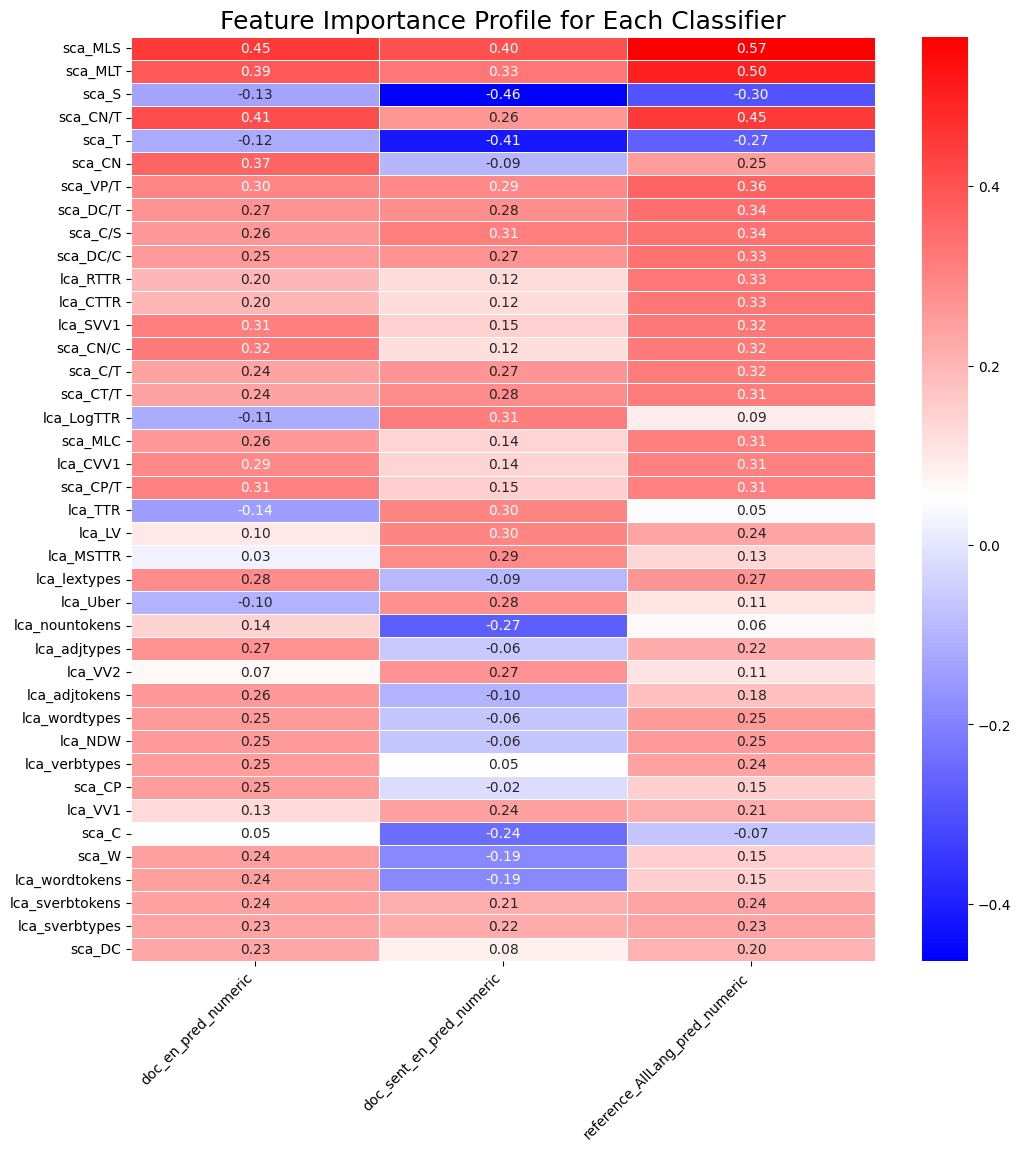

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Prepare the data for correlation ---
# Create a numerical version of each classifier's prediction
cefr_to_numeric = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}
classifier_pred_cols = ['doc_en_pred', 'doc_sent_en_pred', 'reference_AllLang_pred']
classifier_conf_cols = ['doc_en_conf', 'doc_sent_en_conf', 'reference_AllLang_conf']

for col in classifier_pred_cols:
    numeric_col_name = f"{col}_numeric"
    df_classifiers[numeric_col_name] = df_classifiers[col].map(cefr_to_numeric)

# --- 2. Calculate the correlation matrix ---
# Select all lca, sca, and the new numeric prediction columns
feature_cols = [col for col in df_classifiers.columns if col.startswith('lca_') or col.startswith('sca_')]
correlation_targets = [f"{col}_numeric" for col in classifier_pred_cols]
correlation_df = df_classifiers[feature_cols + correlation_targets].corr()

# Isolate the correlations of features with our targets
feature_correlations = correlation_df[correlation_targets].drop(correlation_targets)


# --- 3. Find the most important features overall ---
# We'll find the top 25 features that have the highest correlation with ANY model
# This makes sure we see features that are important even if only for one model
top_features = feature_correlations.abs().max(axis=1).nlargest(40).index


# --- 4. Visualize the comparison as a heatmap ---
plt.figure(figsize=(12, 12))
sns.heatmap(
    feature_correlations.loc[top_features],
    annot=True,          # Show the correlation values
    cmap='bwr',      # Use a color-blind friendly palette
    fmt='.2f',           # Format values to 2 decimal places
    linewidths=.5
)
plt.title('Feature Importance Profile for Each Classifier', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.show()

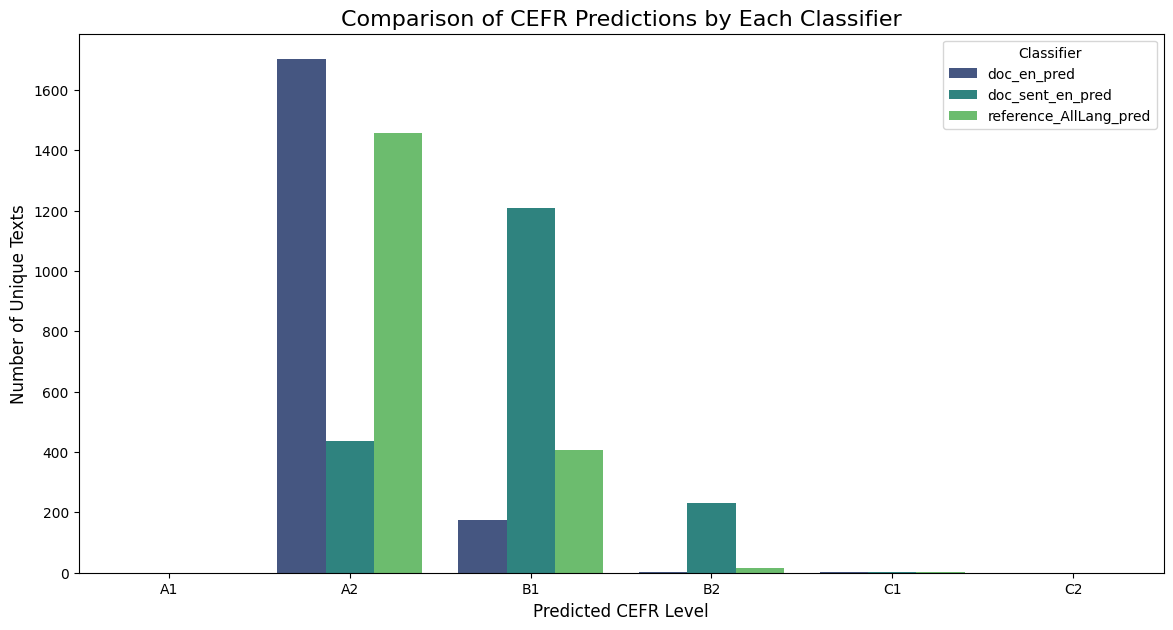

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Prepare the data by "melting" it ---
# This restructures the DataFrame so it's easy to create a grouped plot.
df_melted = df_classifiers.melt(
    id_vars=['text_id'],
    value_vars=['doc_en_pred', 'doc_sent_en_pred', 'reference_AllLang_pred'],
    var_name='classifier',
    value_name='predicted_cefr'
)

# --- 2. Create the grouped bar chart ---
plt.figure(figsize=(14, 7))
ax = sns.countplot(
    x='predicted_cefr',
    hue='classifier',
    data=df_melted,
    order=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], # Ensure correct order
    palette='viridis'
)

ax.set_title('Comparison of CEFR Predictions by Each Classifier', fontsize=16)
ax.set_xlabel('Predicted CEFR Level', fontsize=12)
ax.set_ylabel('Number of Unique Texts', fontsize=12)
plt.legend(title='Classifier')
plt.show()

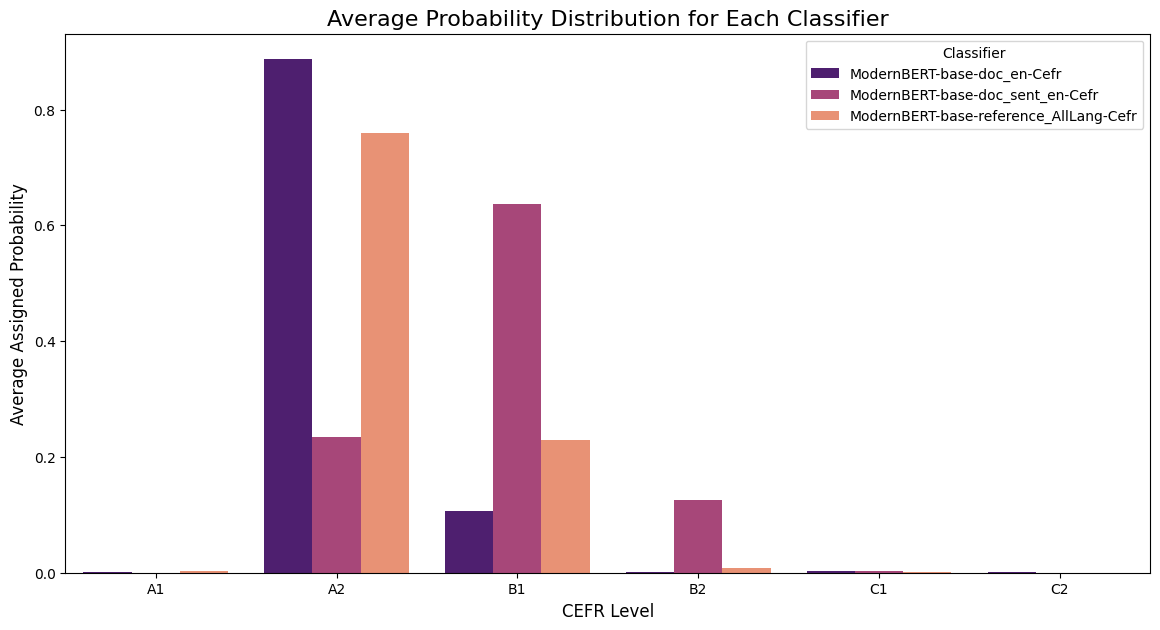

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Calculate the average distribution for each classifier ---
avg_distributions = {}
model_names = list(df_classifiers['cefr_probas'].dropna().iloc[0].keys())

for model_name in model_names:
    # Extract the probability dictionary for the current model from each row
    probas_list = df_classifiers['cefr_probas'].dropna().apply(lambda x: x.get(model_name, {}))
    
    # Convert the list of dictionaries to a DataFrame
    probas_df = pd.DataFrame(list(probas_list))
    
    # Calculate the mean probability for each CEFR level and store it
    avg_distributions[model_name] = probas_df.mean()

# --- 2. Prepare the data for plotting ---
# Convert the results into a single, plottable DataFrame
plot_df = pd.DataFrame(avg_distributions)
plot_df = plot_df.reset_index().rename(columns={'index': 'CEFR_Level'})

# "Melt" the DataFrame into a long format for seaborn
plot_df_melted = plot_df.melt(
    id_vars='CEFR_Level',
    var_name='classifier',
    value_name='average_probability'
)

# --- 3. Create the grouped bar chart ---
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='CEFR_Level',
    y='average_probability',
    hue='classifier',
    data=plot_df_melted,
    order=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'],
    palette='magma'
)

ax.set_title('Average Probability Distribution for Each Classifier', fontsize=16)
ax.set_xlabel('CEFR Level', fontsize=12)
ax.set_ylabel('Average Assigned Probability', fontsize=12)
plt.legend(title='Classifier')
plt.show()

Dynamically found top features for discriminating between A2 and B1: ['sca_S', 'sca_T', 'lca_nountokens', 'lca_lextokens', 'lca_TTR', 'sca_W', 'lca_wordtokens', 'sca_C', 'lca_LogTTR', 'lca_LV']


/tmp/ipykernel_1332099/1765492407.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='comparison_group', y=feature, data=df_classifiers, ax=axes[i], palette=['#a2d2ff', '#ffafcc'])
/tmp/ipykernel_1332099/1765492407.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='comparison_group', y=feature, data=df_classifiers, ax=axes[i], palette=['#a2d2ff', '#ffafcc'])
/tmp/ipykernel_1332099/1765492407.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='comparison_group', y=feature, data=df_classifiers, ax=axes[i], palette=['#a2d2ff', '#ff

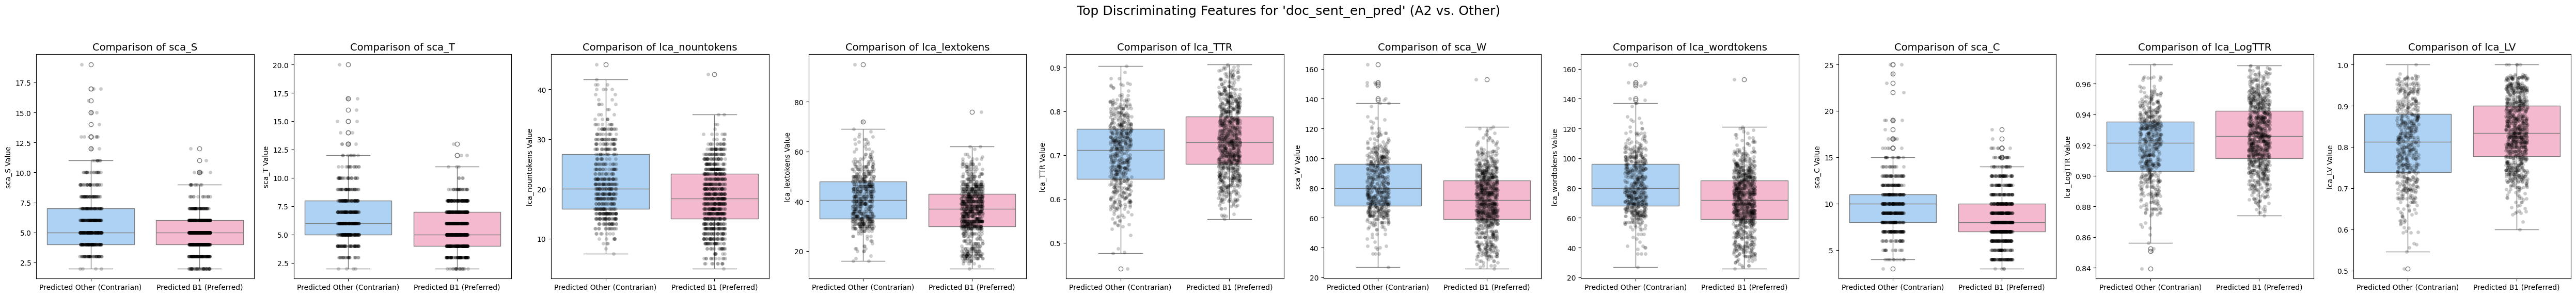

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Find the Most Discriminating Features (Your Method) ---

classifier_to_analyze = 'doc_sent_en_pred'
preferred_label = 'B1'
secondary_label = 'A2'

# Filter the DataFrame to only the two groups we want to compare
df_subset = df_classifiers[df_classifiers[classifier_to_analyze].isin([preferred_label, secondary_label])].copy()

# Identify all available linguistic feature columns
feature_cols = [col for col in df_classifiers.columns if col.startswith('lca_') or col.startswith('sca_')]

# Standardize the feature columns (z-score) so we can compare their differences fairly
for col in feature_cols:
    mean = df_subset[col].mean()
    std = df_subset[col].std()
    df_subset[f'{col}_std'] = (df_subset[col] - mean) / std

# Group by the predicted label and find the mean for each standardized feature
grouped_means = df_subset.groupby(classifier_to_analyze)[[f'{col}_std' for col in feature_cols]].mean()

# Calculate the absolute difference in means between the two groups
mean_differences = (grouped_means.loc[preferred_label] - grouped_means.loc[secondary_label]).abs()

# Get the top 4 features with the largest difference
key_features = mean_differences.nlargest(10).index.str.replace('_std', '').tolist()

print(f"Dynamically found top features for discriminating between A2 and B1: {key_features}")


# --- 2. Create comparison plots using these new key features ---
df_classifiers['comparison_group'] = np.where(
    df_classifiers[classifier_to_analyze] == preferred_label,
    f'Predicted {preferred_label} (Preferred)',
    'Predicted Other (Contrarian)'
)

fig, axes = plt.subplots(1, len(key_features), figsize=(50, 6), sharey=False)
fig.suptitle(f"Top Discriminating Features for '{classifier_to_analyze}' (A2 vs. Other)", fontsize=18)

for i, feature in enumerate(key_features):
    sns.boxplot(x='comparison_group', y=feature, data=df_classifiers, ax=axes[i], palette=['#a2d2ff', '#ffafcc'])
    sns.stripplot(x='comparison_group', y=feature, data=df_classifiers, ax=axes[i], alpha=0.2, color='black')
    axes[i].set_title(f'Comparison of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(f'{feature} Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## STS 

In [27]:
import pandas as pd

# --- 1. Candidate vs. Original ---
part1 = df[[
    'text_id', 'model', 'base_prompt', 'sampling_strategy', 'few_shot',
    'simplified_text', 'original', 'meaningbert_orig', 'bertscore_f1_orig'
]].copy()
part1['text_1_type'] = 'Candidate'
part1['text_2_type'] = 'Original'
part1.columns = [
    'text_id', 'model', 'base_prompt', 'sampling_strategy', 'few_shot',
    'text_1', 'text_2', 'meaningbert', 'bertscore_f1', 'text_1_type', 'text_2_type'
]

# --- 2. Candidate vs. Reference ---
part2 = df[[
    'text_id', 'model', 'base_prompt', 'sampling_strategy', 'few_shot',
    'simplified_text', 'reference', 'meaningbert_ref', 'bertscore_f1_ref'
]].copy()
part2['text_1_type'] = 'Candidate'
part2['text_2_type'] = 'Reference'
part2.columns = [
    'text_id', 'model', 'base_prompt', 'sampling_strategy', 'few_shot',
    'text_1', 'text_2', 'meaningbert', 'bertscore_f1', 'text_1_type', 'text_2_type'
]

# --- 3. Original vs. Reference ---
part3 = df[['text_id', 'original', 'reference', 'src_ref_meaningbert', 'src_ref_bertscore_f1']] \
    .drop_duplicates(subset=['text_id']).copy()
part3['text_1_type'] = 'Original'
part3['text_2_type'] = 'Reference'
part3.columns = [
    'text_id', 'text_1', 'text_2', 'meaningbert', 'bertscore_f1', 'text_1_type', 'text_2_type'
]

# --- 4. Combine into the final, clear DataFrame ---
df_sts = pd.concat([part1, part2, part3], ignore_index=True)

print("✅ Rebuilt df_sts with a clearer structure.")
display(df_sts.sample(5, random_state=1))

✅ Rebuilt df_sts with a clearer structure.


,text_id,model,base_prompt,sampling_strategy,few_shot,text_1,text_2,meaningbert,bertscore_f1,text_1_type,text_2_type
761,09-a2,Gemma 3,With Description,Contrastive,2.0,"Some bridges fall down, and it’s a puzzle. Eng...","Some bridge collapses are mysteries, and engin...",0.5833,0.9177,Candidate,Original
541,07-a2,GPT-4o,With Description,N/A,0.0,"The ""Life of Pi"" is a special story about a bo...",The Life of Pi tells the extraordinary story o...,0.7609,0.9283,Candidate,Original
1453,17-a2,Gemma 3,Target Only,N/A,0.0,Understanding that people might have different...,Having an increased awareness of the possible ...,0.6426,0.9053,Candidate,Original
1221,14-b1,Opus 3,Target Only,N/A,0.0,When Wasfia Nazreen was a young girl in Bangla...,Wasfia Nazreen first came across a hula hoop a...,0.7825,0.9242,Candidate,Original
3419,18-b1,Opus 3,With Description,Confidence-Based,2.0,Unlike many other famous singers who sell a lo...,Springsteen is different from many other music...,0.8320,0.9245,Candidate,Reference


In [31]:
# rebuild comparison_type
df_sts['comparison_type'] = df_sts['text_1_type'] + ' vs. ' + df_sts['text_2_type']

# --- 2. Merge features and calculate DIRECTIONAL deltas ---

# Create the feature lookup table from df_classifiers
feature_cols = [col for col in df_classifiers.columns if col.startswith('lca_') or col.startswith('sca_')]
df_features_lookup = df_classifiers[['text'] + feature_cols].set_index('text')

# Merge features for text_1 and text_2
df_sts_enriched = pd.merge(df_sts, df_features_lookup, left_on='text_1', right_index=True, how='left')
df_sts_enriched = pd.merge(df_sts_enriched, df_features_lookup, left_on='text_2', right_index=True, how='left', suffixes=('_1', '_2'))

# Calculate the directional difference (text_1 - text_2)
for feature in feature_cols:
    df_sts_enriched[f'delta_{feature}'] = (df_sts_enriched[f'{feature}_1'] - df_sts_enriched[f'{feature}_2'])

# Create the final, clean DataFrame
delta_cols = [col for col in df_sts_enriched.columns if col.startswith('delta_')]
final_sts_cols = df_sts.columns.tolist() + delta_cols
df_sts = df_sts_enriched[final_sts_cols].copy()

print("✅ Final df_sts created with directional feature deltas.")

✅ Final df_sts created with directional feature deltas.


In [32]:
# !pip install rapidfuzz
import pandas as pd
from rapidfuzz.distance import Levenshtein
import numpy as np

# --- 1. Calculate Word Counts and Compression Ratio ---
# Calculate word count for each text column
df_sts['text_1_word_count'] = df_sts['text_1'].str.split().str.len()
df_sts['text_2_word_count'] = df_sts['text_2'].str.split().str.len()

# Calculate the ratio, adding a small number to avoid division by zero
df_sts['compression_ratio'] = df_sts['text_1_word_count'] / (df_sts['text_2_word_count'] + 1e-6)


# --- 2. Calculate Levenshtein (Edit) Distance ---
# This applies the distance function to each row. This may take a moment.
print("Calculating Levenshtein edit distance for all pairs...")
df_sts['edit_distance'] = df_sts.apply(
    lambda row: Levenshtein.distance(row['text_1'], row['text_2']),
    axis=1
)

print("✅ New features added.")

Calculating Levenshtein edit distance for all pairs...
✅ New features added.


In [33]:
import pandas as pd
import difflib
import spacy

# --- 1. Define the function to calculate edit ratios ---
# (Make sure you have a spaCy model loaded)
nlp = spacy.load("en_core_web_sm")

def calculate_edit_ratios(text_a, text_b):
    """
    Calculates the deletion, insertion, and replacement ratios
    between two texts at the word level.
    """
    tokens_a = [t.text for t in nlp(text_a) if not t.is_space]
    tokens_b = [t.text for t in nlp(text_b) if not t.is_space]
    
    if not tokens_a:
        return {'deletion_ratio': 0, 'insertion_ratio': 0, 'replacement_ratio': 0}
        
    matcher = difflib.SequenceMatcher(None, tokens_a, tokens_b)
    
    deleted_words = 0
    inserted_words = 0
    replaced_words = 0
    
    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'delete':
            deleted_words += (i2 - i1)
        elif tag == 'insert':
            inserted_words += (j2 - j1)
        elif tag == 'replace':
            replaced_words += (i2 - i1)
            
    total_original_words = len(tokens_a)
    ratios = {
        'deletion_ratio': deleted_words / total_original_words,
        'insertion_ratio': inserted_words / total_original_words,
        'replacement_ratio': replaced_words / total_original_words,
    }
    
    return ratios

# --- 2. Apply the function to each row of the DataFrame ---
# This may take a moment to run on the full dataset.
print("Calculating edit ratios for all pairs...")
edit_ratios_df = df_sts.apply(
    lambda row: pd.Series(calculate_edit_ratios(row['text_1'], row['text_2'])),
    axis=1
)

# --- 3. Join the new ratio columns back to the main DataFrame ---
df_sts = pd.concat([df_sts, edit_ratios_df], axis=1)

print("✅ Edit ratio features added.")

# --- 4. Verify the new columns ---
print("\n--- DataFrame with New Edit Ratio Columns ---")
display_cols = [
    'comparison_type', 'deletion_ratio', 'insertion_ratio', 'replacement_ratio'
]
display(df_sts[display_cols].head())

Calculating edit ratios for all pairs...
✅ Edit ratio features added.

--- DataFrame with New Edit Ratio Columns ---


,comparison_type,deletion_ratio,deletion_ratio,insertion_ratio,insertion_ratio,replacement_ratio,replacement_ratio
0,Candidate vs. Original,0.026316,0.026316,0.078947,0.078947,0.526316,0.526316
0,Candidate vs. Original,0.026316,0.026316,0.078947,0.078947,0.526316,0.526316
0,Candidate vs. Original,0.026316,0.026316,0.078947,0.078947,0.526316,0.526316
0,Candidate vs. Original,0.026316,0.026316,0.078947,0.078947,0.526316,0.526316
1,Candidate vs. Original,0.035714,0.035714,0.071429,0.071429,0.547619,0.547619


In [ ]:
display(df_sts.sample(5, random_state=1))

,text_id,model,base_prompt,sampling_strategy,few_shot,text_1,text_2,meaningbert,bertscore_f1,text_1_type,text_2_type,delta_lca_wordtypes,delta_lca_wordtokens,delta_lca_swordtypes,delta_lca_swordtokens,delta_lca_lextypes,delta_lca_lextokens,delta_lca_slextypes,delta_lca_slextokens,delta_lca_verbtypes,delta_lca_verbtokens,delta_lca_sverbtypes,delta_lca_sverbtokens,delta_lca_adjtypes,delta_lca_adjtokens,...,delta_sca_VP,delta_sca_C,delta_sca_T,delta_sca_DC,delta_sca_CT,delta_sca_CP,delta_sca_CN,delta_sca_MLS,delta_sca_MLT,delta_sca_MLC,delta_sca_C/S,delta_sca_VP/T,delta_sca_C/T,delta_sca_DC/C,delta_sca_DC/T,delta_sca_T/S,delta_sca_CT/T,delta_sca_CP/T,delta_sca_CP/C,delta_sca_CN/T,delta_sca_CN/C,text_1_word_count,text_2_word_count,compression_ratio,edit_distance
3633,17-b1,NaN,NaN,NaN,NaN,Having an increased awareness of the possible ...,An increased knowledge of the possible differe...,0.6885,0.9439,Original,Reference,1.0,-2.0,6.0,6.0,3.0,-2.0,6.0,6.0,3.0,1.0,1.0,1.0,1.0,-1.0,...,3.0,1.0,0.0,1.0,2.0,0.0,2.0,9.0833,-0.50,-1.0531,1.2500,0.75,0.25,0.0303,0.25,0.3333,0.50,0.00,-0.0303,0.5,0.0455,115,116,0.991379,301
1323,15-b1,Gemma 3,With Description,N/A,0.0,"Based on our research, we think Girox Foods sh...","On the basis of these findings, we recommend t...",0.8709,0.9228,Candidate,Original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,100,0.970000,408
1356,16-a2,Opus 3,Target Only,N/A,0.0,Simplified Document: \n\nIn the last 200 year...,"In the last two centuries, improvements in tec...",0.6367,0.9158,Candidate,Original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,65,1.015385,267
957,11-b1,Opus 1,With Description,Confidence-Based,1.0,Much of our business today takes place across ...,Much of today's business is conducted across i...,0.8303,0.9312,Candidate,Original,-10.0,-25.0,-8.0,-8.0,-10.0,-11.0,-8.0,-8.0,1.0,1.0,1.0,1.0,0.0,0.0,...,2.0,3.0,1.0,3.0,1.0,-2.0,-8.0,-18.4667,-10.05,-6.8286,-0.3333,-0.05,0.25,0.1714,0.45,-0.3333,0.05,-0.55,-0.3286,-2.5,-1.5714,76,100,0.760000,343
2224,05-b1,Gemma 3,With Description,Random,1.0,Some asteroids could be dangerous because they...,'Potentially Hazardous Asteroids' are space ro...,0.6451,0.9088,Candidate,Reference,-11.0,-10.0,-6.0,-4.0,-7.0,-3.0,-6.0,-4.0,0.0,0.0,-2.0,-2.0,-1.0,-1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-5.7500,-2.00,-2.1528,-0.2000,0.00,0.20,0.0694,0.20,-0.2500,0.20,0.00,-0.0139,0.0,-0.0972,64,75,0.853333,253


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We'll select the two score columns and run .describe()
score_stats = df_sts[['meaningbert', 'bertscore_f1']].describe()

print("--- Overall Statistics for Similarity Scores ---")
display(score_stats)

--- Overall Statistics for Similarity Scores ---


,meaningbert,bertscore_f1
count,5480.000000,5480.000000
mean,0.782327,0.930380
std,0.100608,0.019854
min,0.195300,0.862800
25%,0.697600,0.916000
50%,0.819500,0.929150
75%,0.853525,0.945000
max,0.945300,0.990100


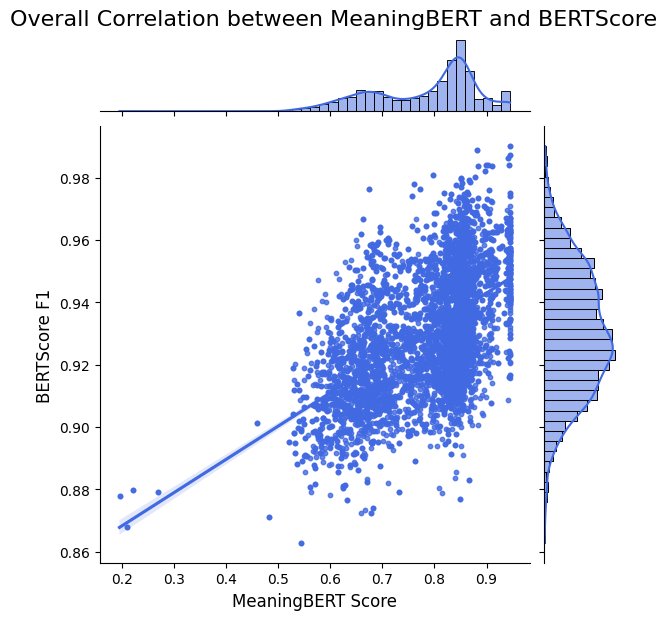

Pearson Correlation (linear): 0.5405
Spearman's Rank Correlation (monotonic): 0.5287


In [ ]:
# --- Visualize the correlation ---
g = sns.jointplot(
    data=df_sts,
    x='meaningbert',
    y='bertscore_f1',
    kind='reg', # Add a regression line
    joint_kws={'color': 'royalblue', 'scatter_kws': {'s': 10}},
    marginal_kws={'color': 'royalblue', 'kde': True}
)
g.fig.suptitle('Overall Correlation between MeaningBERT and BERTScore', y=1.02, fontsize=16)
g.set_axis_labels('MeaningBERT Score', 'BERTScore F1', fontsize=12)
plt.show()

# --- Calculate correlation coefficients ---
pearson_corr = df_sts['meaningbert'].corr(df_sts['bertscore_f1'], method='pearson')
spearman_corr = df_sts['meaningbert'].corr(df_sts['bertscore_f1'], method='spearman')

print(f"Pearson Correlation (linear): {pearson_corr:.4f}")
print(f"Spearman's Rank Correlation (monotonic): {spearman_corr:.4f}")

--- Statistics by Comparison Type ---


meaningbert                                                                bertscore_f1  \
                              count      mean       std     min      25%      50%      75%     max        count   
comparison_type                                                                                                   
Candidate vs. Original       3600.0  0.782427  0.102770  0.1953  0.69730  0.81960  0.85360  0.9453       3600.0   
Candidate vs. Reference      1800.0  0.783300  0.094089  0.5301  0.70125  0.81995  0.85245  0.9453       1800.0   
Original vs. Reference         80.0  0.755922  0.136087  0.4591  0.63615  0.80910  0.87055  0.9452         80.0   

                                                                                         
                             mean       std     min       25%     50%       75%     max  
comparison_type                                                                          
Candidate vs. Original   0.933818  0.020475  0.8628  0.919375  0.9350  0.949200  0.9901  
Candidate vs. Reference  0.923679  0.016288  0.8724  0.912900  0.9230  0.933300  0.9724  
Original vs. Reference   0.926463  0.024900  0.8863  0.903475  0.9268  0.944775  0.9841

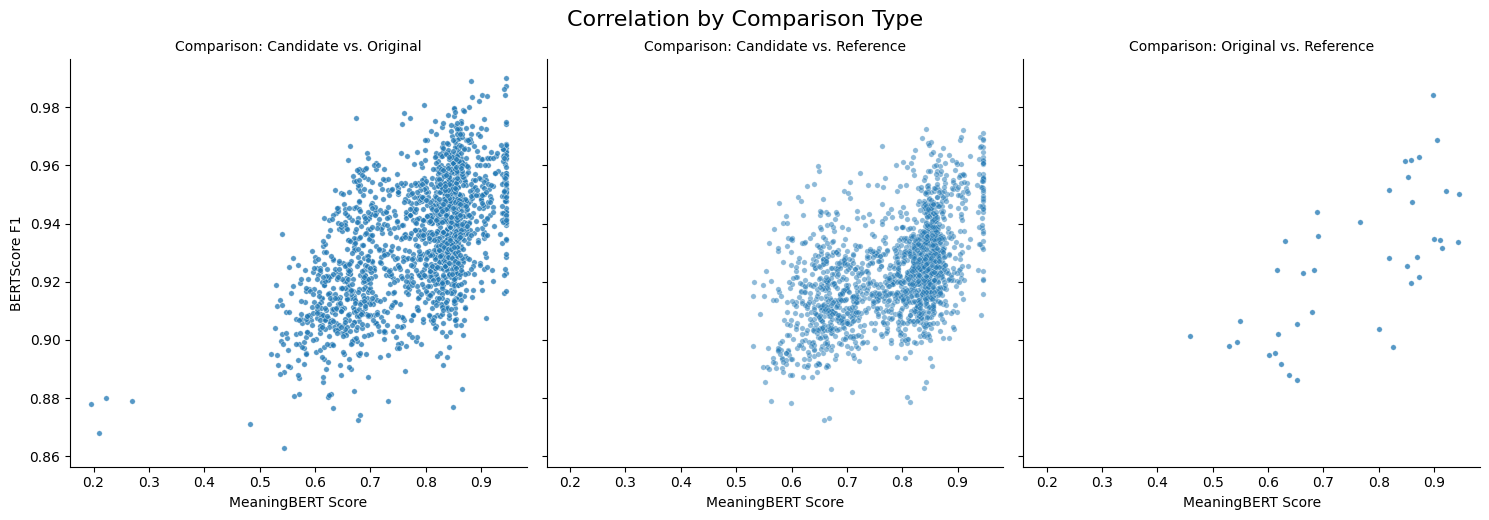

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Get stats for each group ---
print("--- Statistics by Comparison Type ---")
display(df_sts.groupby('comparison_type')[['meaningbert', 'bertscore_f1']].describe())

# --- 3. Create a faceted scatter plot ---
g_facet = sns.relplot(
    data=df_sts,
    x='meaningbert',
    y='bertscore_f1',
    col='comparison_type', # This will now work correctly
    kind='scatter',
    alpha=0.5,
    s=15
)
g_facet.fig.suptitle('Correlation by Comparison Type', y=1.03, fontsize=16)
g_facet.set_axis_labels("MeaningBERT Score", "BERTScore F1")
g_facet.set_titles("Comparison: {col_name}")
plt.show()

In [ ]:
from difflib import SequenceMatcher
from IPython.display import HTML, display, Markdown
import spacy

# --- Your provided function to render the diff ---
# Load spaCy tokenizer
nlp = spacy.load("en_core_web_sm")

def render_inline_diff(text_a, text_b):
    # Tokenize by word (filter out whitespace)
    tokens_a = [t.text for t in nlp(text_a) if not t.is_space]
    tokens_b = [t.text for t in nlp(text_b) if not t.is_space]

    # Compute diff using SequenceMatcher
    sm = SequenceMatcher(None, tokens_a, tokens_b)
    html = []

    for tag, i1, i2, j1, j2 in sm.get_opcodes():
        if tag == "equal":
            html.append(" ".join(tokens_a[i1:i2]) + " ")
        elif tag == "delete":
            deleted = " ".join(tokens_a[i1:i2])
            html.append(f"<span style='color:red;text-decoration:line-through;'>{deleted}</span> ")
        elif tag == "insert":
            inserted = " ".join(tokens_b[j1:j2])
            html.append(f"<span style='color:green;background-color:#eaffea;'>{inserted}</span> ")
        elif tag == "replace":
            deleted = " ".join(tokens_a[i1:i2])
            inserted = " ".join(tokens_b[j1:j2])
            html.append(
                f"<span style='color:red;text-decoration:line-through;'>{deleted}</span> "
                f"<span style='color:green;background-color:#eaffea;'>{inserted}</span> "
            )

    html_str = " ".join(html)
    display(HTML(f"<div style='font-family:monospace; line-height:1.6em'>{html_str}</div>"))

In [ ]:
df_sts['m_bert_rank'] = df_sts['meaningbert'].rank(pct=True)
df_sts['b_score_rank'] = df_sts['bertscore_f1'].rank(pct=True)

# The disagreement is the absolute difference between these ranks
df_sts['score_disagreement'] = (df_sts['m_bert_rank'] - df_sts['b_score_rank']).abs()

# --- Find the top 5 outliers where the scorers disagreed most ---
outliers = df_sts.nlargest(5, 'score_disagreement')

# --- Loop through and display the diff for each outlier ---
for index, row in outliers.iterrows():
    # Display a header with context for each comparison
    header_text = (
        f"### Comparison Type: {row['comparison_type']}\n"
        f"ID: {row['text_id']} | Model: {row['model']} | Prompt: {row['base_prompt']} | Sampling: {row['sampling_strategy']} | Shots: {row['few_shot']}\n"
        f"**MeaningBERT:** {row['meaningbert']:.3f} ({row['m_bert_rank']:.2%}) | "
        f"**BERTScore F1:** {row['bertscore_f1']:.3f} ({row['b_score_rank']:.2%})\n---"
    )
    display(Markdown(header_text))
    
    # Render the visual diff
    render_inline_diff(row['text_1'], row['text_2'])

### Comparison Type: Candidate vs. Original
ID: 20-a2 | Model: Opus 3 | Prompt: Target Only | Sampling: N/A | Shots: 0.0
**MeaningBERT:** 0.866 (85.05%) | **BERTScore F1:** 0.883 (0.78%)
---

### Comparison Type: Candidate vs. Original
ID: 20-a2 | Model: Opus 3 | Prompt: Target Only | Sampling: N/A | Shots: 0.0
**MeaningBERT:** 0.866 (85.05%) | **BERTScore F1:** 0.883 (0.78%)
---

### Comparison Type: Candidate vs. Reference
ID: 08-a2 | Model: GPT-4o | Prompt: With Description | Sampling: N/A | Shots: 0.0
**MeaningBERT:** 0.884 (90.00%) | **BERTScore F1:** 0.901 (5.79%)
---

### Comparison Type: Candidate vs. Reference
ID: 08-a2 | Model: Gemma 3 | Prompt: Target Only | Sampling: N/A | Shots: 0.0
**MeaningBERT:** 0.893 (91.26%) | **BERTScore F1:** 0.904 (8.50%)
---

### Comparison Type: Candidate vs. Reference
ID: 20-b1 | Model: Opus 3 | Prompt: Target Only | Sampling: N/A | Shots: 0.0
**MeaningBERT:** 0.942 (96.75%) | **BERTScore F1:** 0.909 (14.30%)
---

In [ ]:
from IPython.display import display, Markdown

# (This assumes df_sts is loaded and your render_inline_diff function is defined)

# --- Helper function to display a group of outliers ---
def display_diffs_for_group(dataframe, title):
    """Loops through a dataframe of outliers and displays them."""
    display(Markdown(f"## {title}"))
    for index, row in dataframe.iterrows():
        header_text = (
            f"### Comparison Type: {row['comparison_type']}\n"
            f"ID: {row['text_id']} | Model: {row['model']} | Prompt: {row['base_prompt']} | Sampling: {row['sampling_strategy']} | Shots: {row['few_shot']}\n)"
            f"**MeaningBERT:** {row['meaningbert']:.3f} | "
            f"**BERTScore F1:** {row['bertscore_f1']:.3f}\n---"
        )
        display(Markdown(header_text))
        render_inline_diff(row['text_1'], row['text_2'])

# --- 1. Find and Display the LOWEST Scoring Pairs ---
lowest_meaningbert = df_sts.nsmallest(5, 'meaningbert')
display_diffs_for_group(lowest_meaningbert, "Lowest Scores according to MeaningBERT")

lowest_bertscore = df_sts.nsmallest(5, 'bertscore_f1')
display_diffs_for_group(lowest_bertscore, "Lowest Scores according to BERTScore F1")


# --- 2. Find and Display the HIGHEST Scoring Pairs ---
highest_meaningbert = df_sts.nlargest(3, 'meaningbert')
display_diffs_for_group(highest_meaningbert, "Highest Scores according to MeaningBERT")

highest_bertscore = df_sts.nlargest(3, 'bertscore_f1')
display_diffs_for_group(highest_bertscore, "Highest Scores according to BERTScore F1")

## Lowest Scores according to MeaningBERT

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Random | Shots: 2.0
)**MeaningBERT:** 0.195 | **BERTScore F1:** 0.878
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Random | Shots: 2.0
)**MeaningBERT:** 0.195 | **BERTScore F1:** 0.878
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Contrastive | Shots: 1.0
)**MeaningBERT:** 0.210 | **BERTScore F1:** 0.868
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Contrastive | Shots: 1.0
)**MeaningBERT:** 0.210 | **BERTScore F1:** 0.868
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Contrastive | Shots: 0.0
)**MeaningBERT:** 0.222 | **BERTScore F1:** 0.880
---

## Lowest Scores according to BERTScore F1

### Comparison Type: Candidate vs. Original
ID: 15-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Confidence-Based | Shots: 1.0
)**MeaningBERT:** 0.544 | **BERTScore F1:** 0.863
---

### Comparison Type: Candidate vs. Original
ID: 15-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Confidence-Based | Shots: 1.0
)**MeaningBERT:** 0.544 | **BERTScore F1:** 0.863
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Contrastive | Shots: 1.0
)**MeaningBERT:** 0.210 | **BERTScore F1:** 0.868
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Contrastive | Shots: 1.0
)**MeaningBERT:** 0.210 | **BERTScore F1:** 0.868
---

### Comparison Type: Candidate vs. Original
ID: 17-a2 | Model: Claude 4 | Prompt: With Description | Sampling: Confidence-Based | Shots: 1.0
)**MeaningBERT:** 0.482 | **BERTScore F1:** 0.871
---

## Highest Scores according to MeaningBERT

### Comparison Type: Candidate vs. Original
ID: 02-b1 | Model: GPT-5 | Prompt: With Description | Sampling: Confidence-Based | Shots: 1.0
)**MeaningBERT:** 0.945 | **BERTScore F1:** 0.954
---

### Comparison Type: Candidate vs. Original
ID: 02-b1 | Model: GPT-5 | Prompt: With Description | Sampling: Confidence-Based | Shots: 1.0
)**MeaningBERT:** 0.945 | **BERTScore F1:** 0.954
---

### Comparison Type: Candidate vs. Original
ID: 02-b1 | Model: Claude 4 | Prompt: With Description | Sampling: Contrastive | Shots: 1.0
)**MeaningBERT:** 0.945 | **BERTScore F1:** 0.962
---

## Highest Scores according to BERTScore F1

### Comparison Type: Candidate vs. Original
ID: 07-b1 | Model: Claude 4 | Prompt: With Description | Sampling: Random | Shots: 1.0
)**MeaningBERT:** 0.945 | **BERTScore F1:** 0.990
---

### Comparison Type: Candidate vs. Original
ID: 07-b1 | Model: Claude 4 | Prompt: With Description | Sampling: Random | Shots: 1.0
)**MeaningBERT:** 0.945 | **BERTScore F1:** 0.990
---

### Comparison Type: Candidate vs. Original
ID: 07-b1 | Model: Opus 1 | Prompt: With Description | Sampling: Random | Shots: 2.0
)**MeaningBERT:** 0.881 | **BERTScore F1:** 0.989
---

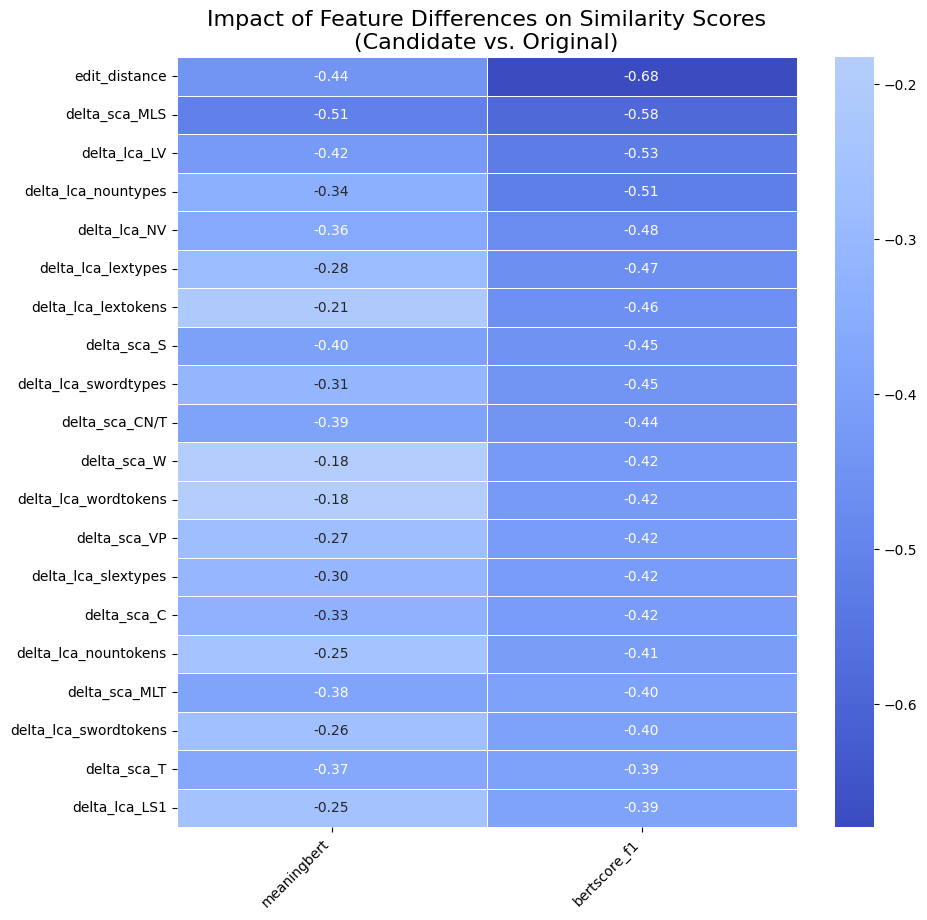

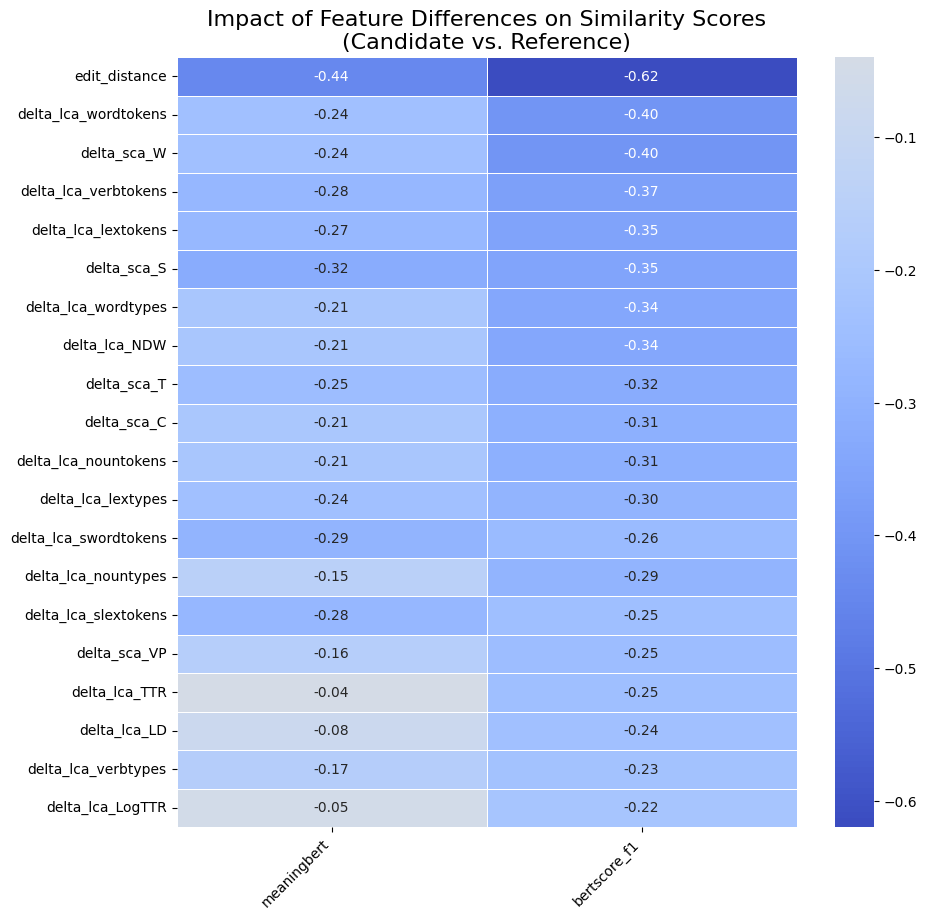

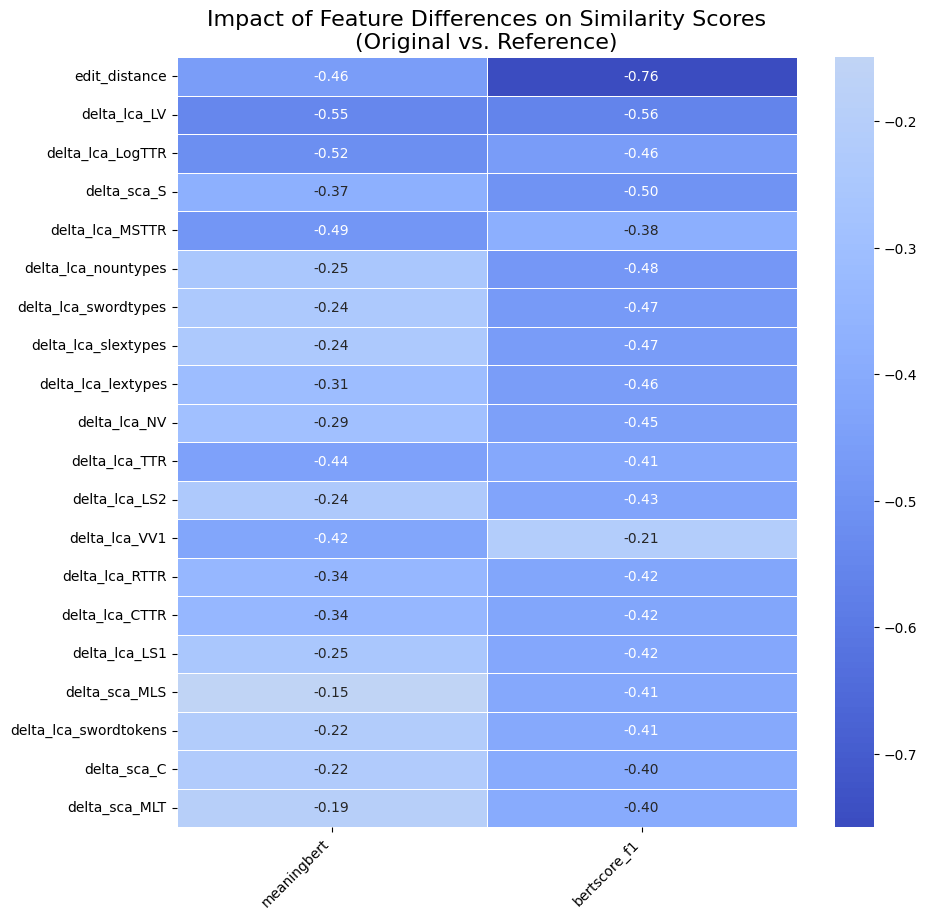

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Define the features we want to analyze ---
delta_cols = [col for col in df_sts.columns if col.startswith('delta_')] + ["edit_distance", "compression_ratio"]
score_cols = ['meaningbert', 'bertscore_f1']

# --- 2. Loop through each comparison type to generate a separate analysis ---
comparison_types = df_sts['comparison_type'].unique()

for comp_type in comparison_types:
    
    # Filter the DataFrame for the current comparison type
    df_subset = df_sts[df_sts['comparison_type'] == comp_type]
    
    # --- THIS IS THE KEY CHANGE ---
    # We take the absolute value of the deltas before calculating correlation
    correlations_df = df_subset[delta_cols].abs()
    correlations_df[score_cols] = df_subset[score_cols]
    
    # Calculate the correlation matrix for this subset
    correlation_matrix = correlations_df.corr()
    
    # Isolate the correlations of features with our target scores
    sts_feature_correlations = correlation_matrix[score_cols].drop(score_cols)
    
    # Find the top 20 features with the highest impact on either score
    top_features = sts_feature_correlations.abs().max(axis=1).nlargest(20).index
    
    # --- 3. Visualize as a heatmap ---
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        sts_feature_correlations.loc[top_features],
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=.5,
        center=0
    )
    plt.title(f'Impact of Feature Differences on Similarity Scores\n({comp_type})', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [36]:
df_sts.comparison_type.unique()

array(['Candidate vs. Original', 'Candidate vs. Reference',
       'Original vs. Reference'], dtype=object)

In [41]:
df_sts[df_sts['comparison_type'] == "Original vs. Reference"].drop_duplicates(subset=["text_id"])

,text_id,model,base_prompt,sampling_strategy,few_shot,text_1,text_2,meaningbert,bertscore_f1,text_1_type,text_2_type,delta_lca_wordtypes,delta_lca_wordtokens,delta_lca_swordtypes,delta_lca_swordtokens,delta_lca_lextypes,delta_lca_lextokens,delta_lca_slextypes,delta_lca_slextokens,delta_lca_verbtypes,delta_lca_verbtokens,delta_lca_sverbtypes,delta_lca_sverbtokens,delta_lca_adjtypes,delta_lca_adjtokens,...,delta_sca_S,delta_sca_VP,delta_sca_C,delta_sca_T,delta_sca_DC,delta_sca_CT,delta_sca_CP,delta_sca_CN,delta_sca_MLS,delta_sca_MLT,delta_sca_MLC,delta_sca_C/S,delta_sca_VP/T,delta_sca_C/T,delta_sca_DC/C,delta_sca_DC/T,delta_sca_T/S,delta_sca_CT/T,delta_sca_CP/T,delta_sca_CP/C,delta_sca_CN/T,delta_sca_CN/C,deletion_ratio,insertion_ratio,replacement_ratio
3600,01-a2,NaN,NaN,NaN,NaN,Now NASA is working towards logging some of th...,Asteroids are small rocks in space. NASA is co...,0.8731,0.9216,Original,Reference,2.0,-4.0,3.0,1.0,1.0,-4.0,3.0,1.0,5.0,5.0,3.0,4.0,-2.0,-4.0,...,-3.0,0.0,-3.0,-4.0,1.0,-2.0,-2.0,2.0,11.3333,13.1429,3.5556,0.5000,1.7143,0.7143,0.2778,0.7143,-0.1667,-0.0953,-0.2857,-0.2222,2.1904,0.7778,0.061728,0.098765,0.580247
3601,01-b1,NaN,NaN,NaN,NaN,Now NASA is working towards logging some of th...,Asteroids are rocks that fly through space. NA...,0.8579,0.9197,Original,Reference,-14.0,-27.0,1.0,1.0,-8.0,-9.0,1.0,1.0,3.0,3.0,2.0,3.0,0.0,-1.0,...,-1.0,-4.0,-7.0,-4.0,-4.0,-4.0,0.0,-2.0,-0.7500,9.8571,4.3846,-1.2500,1.1429,0.1429,-0.0385,0.0000,-0.7500,-0.3810,0.0000,0.0000,1.6190,0.7436,0.012346,0.012346,0.518519
3602,02-a2,NaN,NaN,NaN,NaN,"Earthquakes damage all structures, including b...",An earthquake means when the ground shakes a l...,0.6794,0.9095,Original,Reference,-2.0,-7.0,4.0,3.0,0.0,-2.0,4.0,3.0,-4.0,-5.0,0.0,0.0,2.0,2.0,...,-1.0,-3.0,-2.0,-1.0,-1.0,-1.0,0.0,2.0,1.2500,1.2500,1.8333,-0.1667,-0.3333,-0.1667,-0.0833,-0.1667,0.0000,-0.1667,0.0000,0.0000,0.8333,0.6667,0.333333,0.380952,0.285714
3603,02-b1,NaN,NaN,NaN,NaN,"Earthquakes damage all structures, including b...","Earthquakes damage all kinds of buildings, inc...",0.8605,0.9474,Original,Reference,0.0,1.0,3.0,2.0,0.0,-1.0,3.0,2.0,-2.0,-2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.3333,0.3333,-2.6667,0.3333,0.0000,0.3333,-0.0833,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,0.023810,0.000000,0.380952
3604,03-a2,NaN,NaN,NaN,NaN,"The Hunger Games are an annual event, which th...",The 'Hunger Games' happen every year. Why? To ...,0.5302,0.8981,Original,Reference,4.0,4.0,4.0,3.0,5.0,0.0,4.0,3.0,3.0,3.0,2.0,2.0,-1.0,-2.0,...,-1.0,3.0,3.0,-1.0,3.0,2.0,0.0,2.0,4.0500,4.0500,-6.6429,0.9500,1.1500,0.9500,0.4286,0.7500,0.0000,0.5000,0.0500,-0.1071,0.7000,-0.1429,0.000000,0.052632,0.671053
3605,03-b1,NaN,NaN,NaN,NaN,"The Hunger Games are an annual event, which th...","The Hunger Games are an annual event, which th...",0.8183,0.9514,Original,Reference,-5.0,-7.0,2.0,1.0,-4.0,-6.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,...,-2.0,-1.0,-1.0,-3.0,2.0,1.0,0.0,0.0,4.5833,6.3929,0.3571,0.4167,1.0357,0.6071,0.3036,0.6071,-0.1667,0.3571,0.1071,0.0179,0.6429,0.1071,0.065789,0.092105,0.210526
3606,04-a2,NaN,NaN,NaN,NaN,"Small animals like birds, squirrels, mice and ...","We see small animals, such as birds, mice and ...",0.6300,0.9340,Original,Reference,6.0,14.0,3.0,3.0,9.0,10.0,3.0,3.0,1.0,1.0,0.0,0.0,2.0,3.0,...,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.8000,0.0667,-1.8857,0.4000,0.1667,0.1667,0.1429,0.1667,0.2000,0.1667,0.0333,-0.0857,-0.1333,-0.3714,0.219780,0.054945,0.340659
3607,04-b1,NaN,NaN,NaN,NaN,"Small animals like birds, squirrels, mice and ...","Small animals like birds, mice and insects are...",0.9043,0.9686,Original,Reference,4.0,11.0,0.0,0.0,5.0,6.0,0.0,0.0,-2.0,-2.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.2000,1.8334,1.5714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1666,0.1429,0.6667,0.5715,0.021978,0.032967,0.285714
3608,05-a2,NaN,NaN,NaN,NaN,Potentially Hazardous Asteroids' are rocks clo...,Some rocks in space may be dangerous to Ear